# Investigating the Influence of Cost of Living

### Note: To display the map visualizations below, please install plotly and run the notebook again.

This Jupyter Notebook is dedicated to examining the distribution of living expenses across various factors using a dataset sourced from Kaggle. The dataset encompasses details on diverse attributes including state, county, food cost, healthcare cost, transportation cost, housing cost, taxes, and metropolitan area classification. Our objective is to understand the connections between these factors and the cost of living, employing Python and well-known data analysis libraries for visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px

from sklearn.linear_model import LinearRegression

plt.rcParams["font.size"] =14

In [2]:
df = pd.read_csv("./cost_of_living_us.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [3]:
df.head()

case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640              6217.45896       6147.8298   7422.07836   
2      11581.63260              7075.65816      15824.6940   9769.56228   
3      14503.70760              9134.35620      18802.1892  13101.70320   
4      17425.78560              9942.36396      18802.1892  13469.21880   

    total_cost  median_family_income  
0   39254.0532          73010.414062  
1   57194.3256          73010.414062  
2   76141.0308          73010.414062  
3   94203.5328          73010.414062  
4  100823.5200          73010.414062

In [4]:
df.describe()

case_id  housing_cost     food_cost  transportation_cost  \
count  31430.000000  31430.000000  31430.000000         31430.000000   
mean    1589.311804  11073.673539   8287.504557         13593.856381   
std      917.218414   4165.606147   3271.140249          1640.456562   
min        1.000000   4209.311280   2220.276840          2216.461440   
25%      792.000000   8580.000000   5801.424360         12535.159800   
50%     1593.000000  10416.000000   8129.156280         13698.164400   
75%     2386.000000  12444.000000  10703.624280         14765.758500   
max     3171.000000  61735.587600  31178.619600         19816.482000   

       healthcare_cost  other_necessities_cost  childcare_cost         taxes  \
count     31430.000000            31430.000000    31430.000000  31430.000000   
mean      13394.031748             7015.318377     9879.584233   7657.714782   
std        5204.545710             2397.415490     6778.223399   3339.795571   
min        3476.379960             2611.642080        0.000000   1027.800756   
25%        9667.440000             5286.354120     5341.621590   5597.970360   
50%       13082.700000             6733.056120    10166.340120   6898.468860   
75%       16657.816800             8413.090230    14276.377800   8790.207270   
max       37252.274400            28829.443200    48831.085200  47753.390400   

          total_cost  median_family_income  
count   31430.000000          31420.000000  
mean    70901.683601          68315.997017  
std     21846.545235          16886.970245  
min     30087.662400          25529.976562  
25%     53776.019400          57223.988281  
50%     70977.682800          65955.605469  
75%     85371.341100          76136.070312  
max    223717.548000         177662.468750

In [5]:
df.dropna(inplace=True)

In [6]:
col2 = df[df['family_member_count'] == '2p2c']
col2 = col2.drop(columns=["case_id"])
col2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 7 to 31427
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3142 non-null   object 
 1   isMetro                 3142 non-null   bool   
 2   areaname                3142 non-null   object 
 3   county                  3142 non-null   object 
 4   family_member_count     3142 non-null   object 
 5   housing_cost            3142 non-null   float64
 6   food_cost               3142 non-null   float64
 7   transportation_cost     3142 non-null   float64
 8   healthcare_cost         3142 non-null   float64
 9   other_necessities_cost  3142 non-null   float64
 10  childcare_cost          3142 non-null   float64
 11  taxes                   3142 non-null   float64
 12  total_cost              3142 non-null   float64
 13  median_family_income    3142 non-null   float64
dtypes: bool(1), float64(9), object(4)
memor

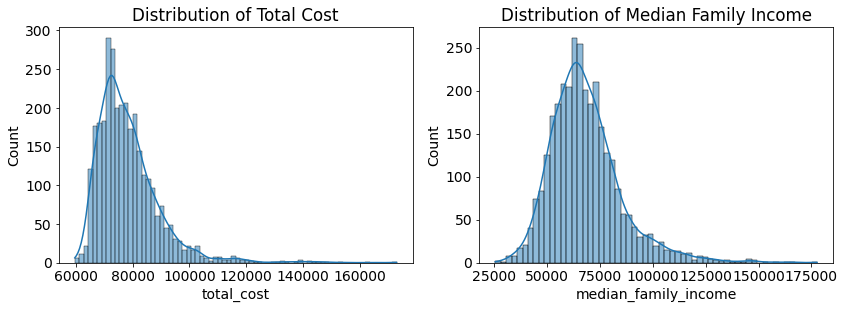

In [7]:
# Histograms for Key Variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(col2['total_cost'], kde=True)
plt.title('Distribution of Total Cost')

plt.subplot(2, 2, 2)
sns.histplot(col2['median_family_income'], kde=True)
plt.title('Distribution of Median Family Income')

plt.tight_layout()
plt.show()

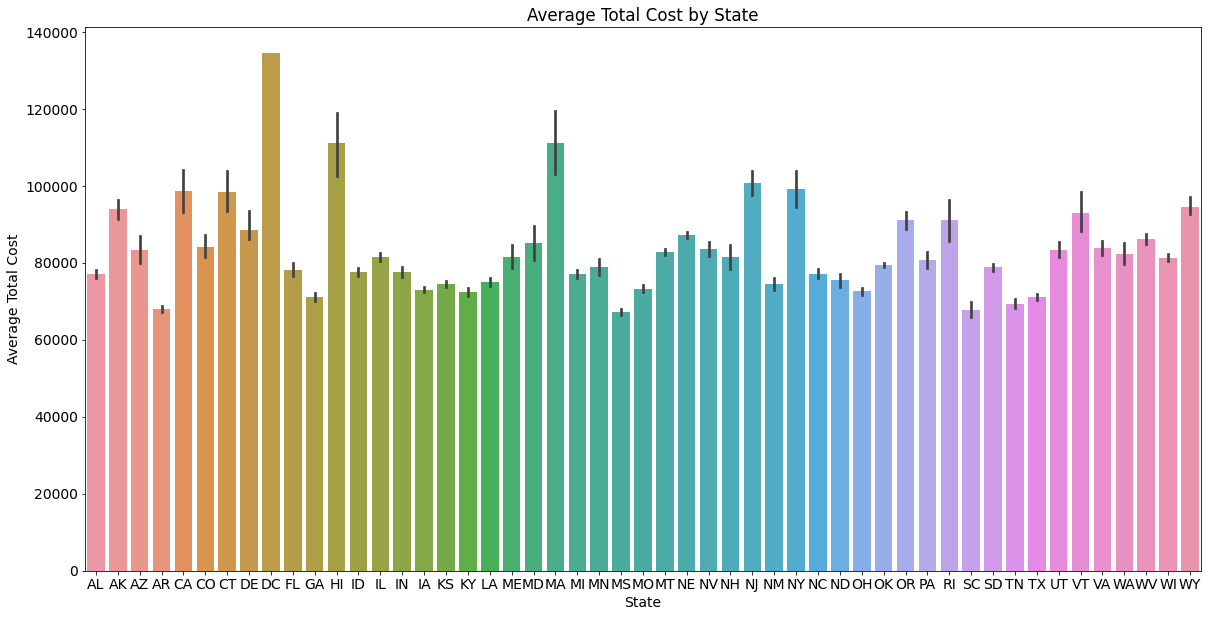

In [8]:
# Creating a bar plot to visualize the average total cost by state
plt.figure(figsize=(20, 10))
sns.barplot(x='state', y='total_cost', data=col2)
plt.title('Average Total Cost by State')
plt.xlabel('State')
plt.ylabel('Average Total Cost')
plt.show()

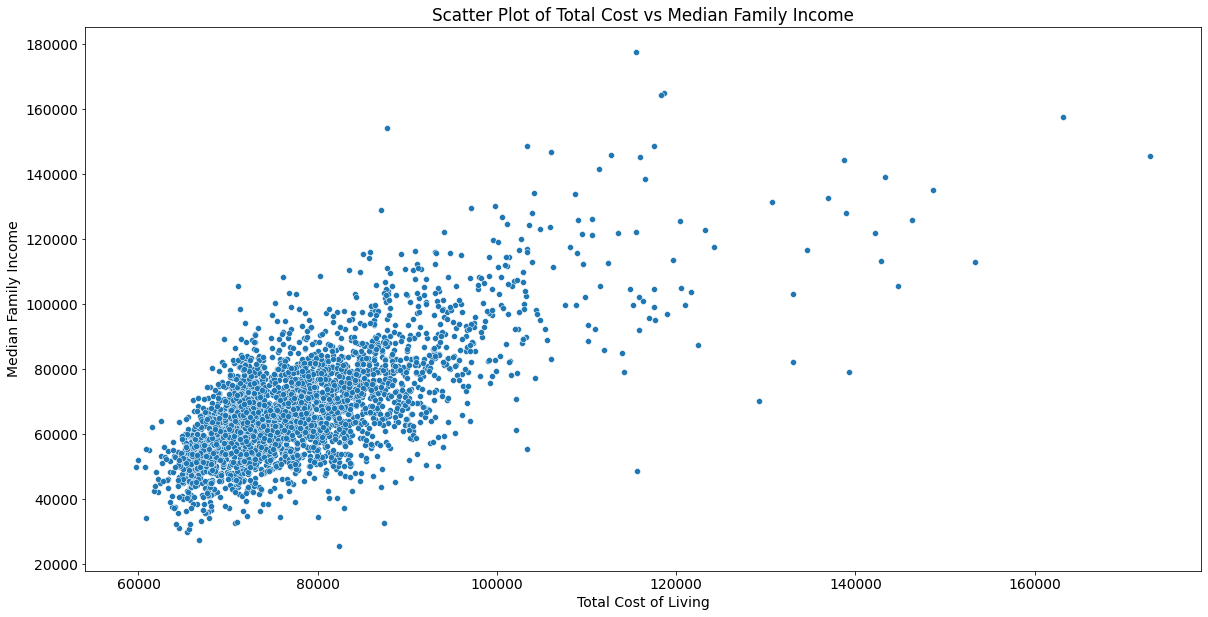

In [9]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='total_cost', y='median_family_income', data=col2)
plt.title('Scatter Plot of Total Cost vs Median Family Income')
plt.xlabel('Total Cost of Living')
plt.ylabel('Median Family Income')
plt.show()

In [10]:
# Calculate the correlation coefficient
correlation_coefficient = col2['total_cost'].corr(col2['median_family_income'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.6986807513156995


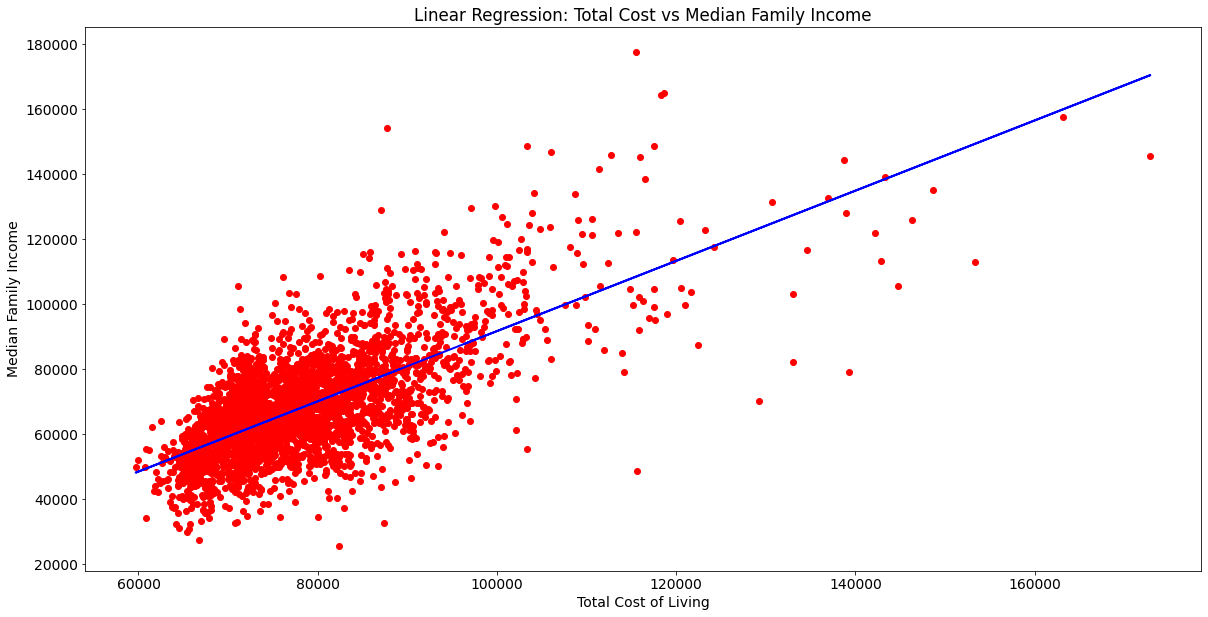

In [11]:
X = col2[['total_cost']]
y = col2['median_family_income']

model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.figure(figsize=(20, 10))
plt.scatter(X, y, color='red')
plt.plot(X['total_cost'], model.predict(X), color='blue', linewidth=2)

plt.title('Linear Regression: Total Cost vs Median Family Income')
plt.xlabel('Total Cost of Living')
plt.ylabel('Median Family Income')
plt.show()

The correlation matrix is showing the correlation coefficients between many variables and providing a snapshot of how strongly pairs of variables are related. (Correlation coefficients range from -1 to 1).

In this case total cost (cost of living) are correlated with other factors such as food cost, healthcare cost, transportation cost, housing cost, taxes, and metropolitan area classification. As you can see there is a positive correlation between housing cost + taxes and the total cost, which might suggest that areas with higher housing and places with a higher tax burden tend to have a higher cost of living overall. On the other hand, there isn't a strong correlation between transportation cost + healthcare cost and the total cost, which might indicate that higher transportation and healthcare costs aren't really associated when determining the cost of living.

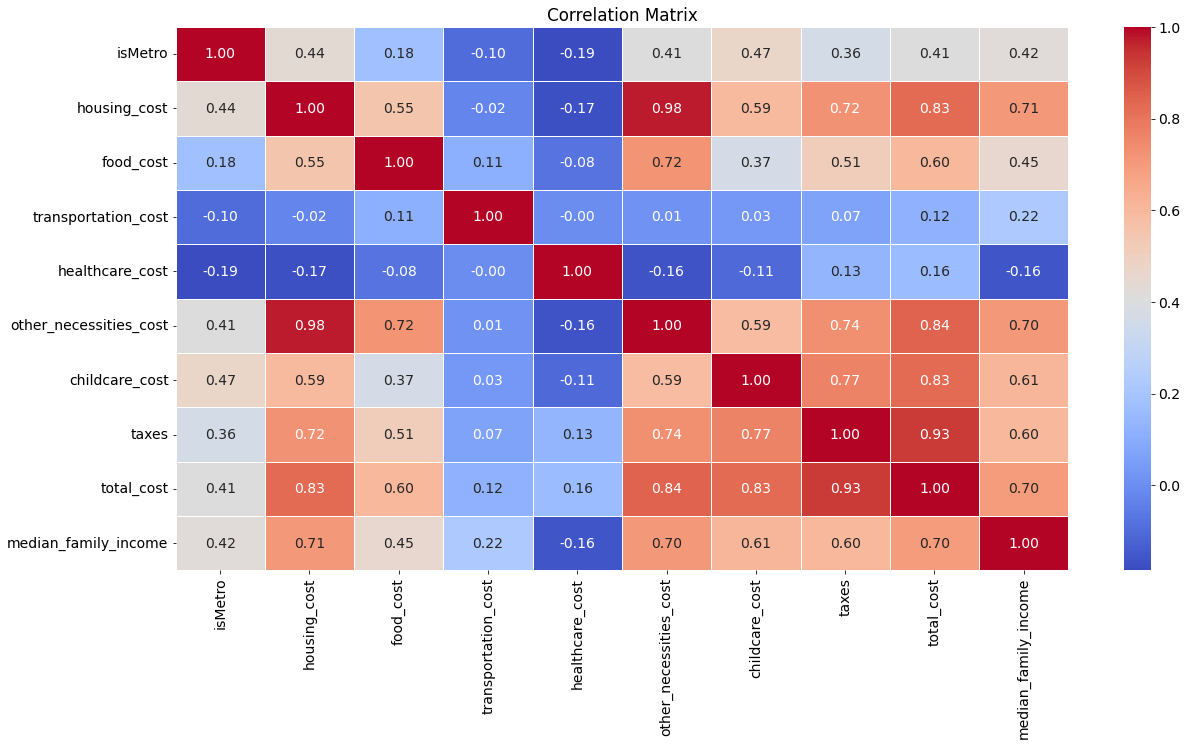

In [12]:
# Correlation Matrix
correlation_matrix = col2.corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
family_income = np.array(df["median_family_income"])
cost_of_living = np.array(df["total_cost"])
states = np.array(df["state"])

This plot shows each county's indivdual family incomes along with their respective cost of living

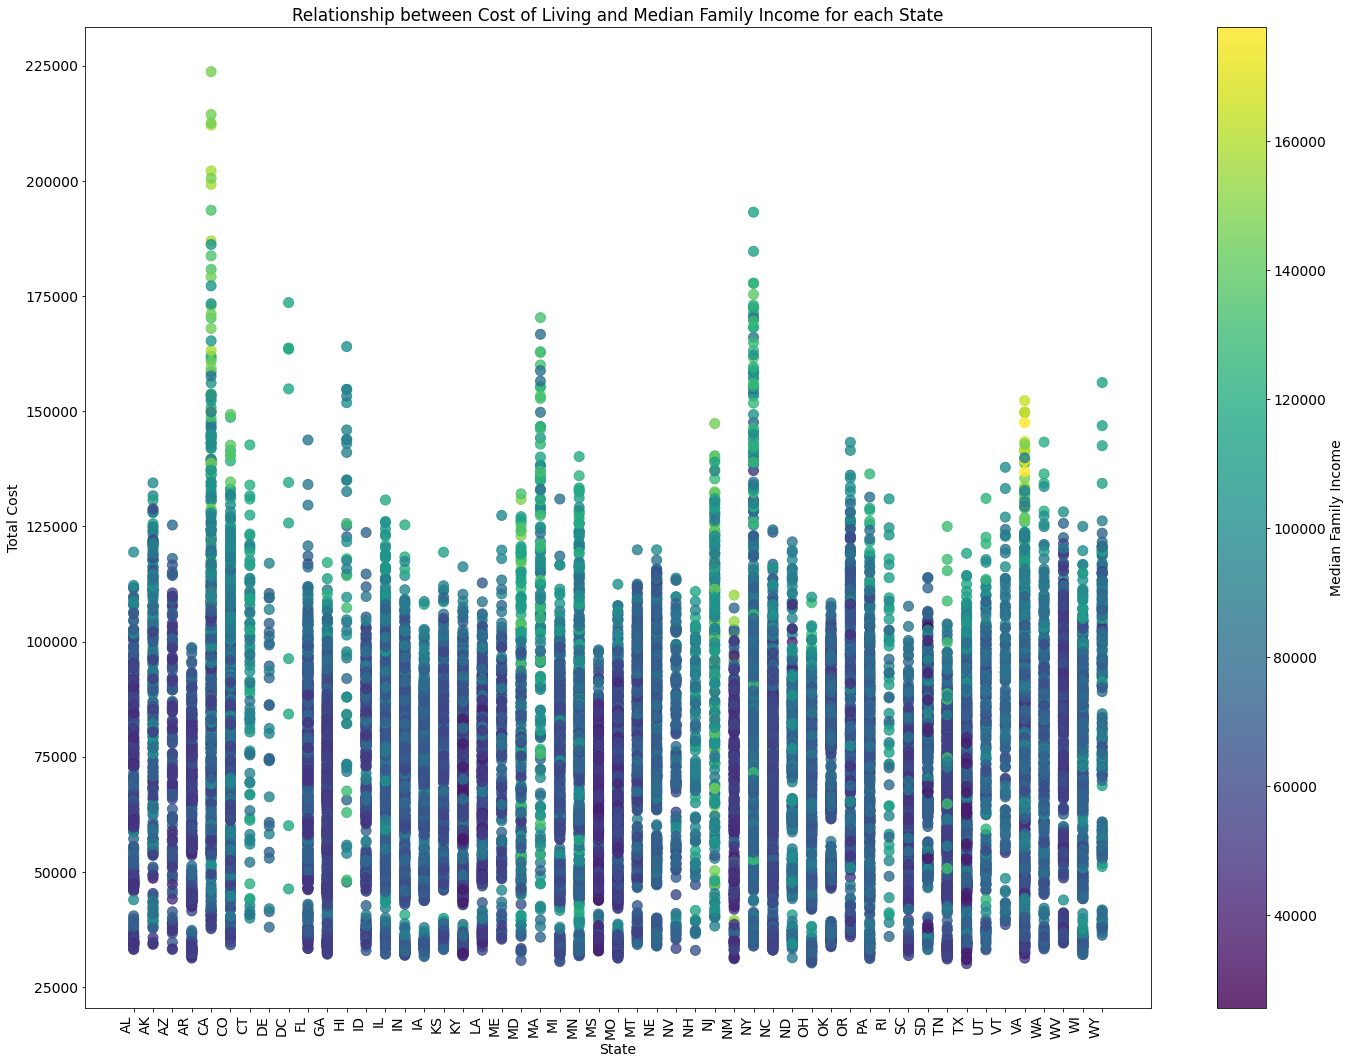

In [14]:
plt.figure(figsize=(20, 15))
plt.scatter(states, cost_of_living, c=family_income, cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Median Family Income')
plt.xlabel('State')
plt.ylabel('Total Cost')
plt.title('Relationship between Cost of Living and Median Family Income for each State')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [15]:
features = ["housing_cost", "food_cost", "transportation_cost", "healthcare_cost", 
            "other_necessities_cost", "childcare_cost", "taxes", "total_cost", "median_family_income"]

all_states = np.unique(states)

data = {
    'State': all_states,
}

my_df = pd.DataFrame(data)

for feature in features:
    my_arr = []
    for s in all_states:
        my_arr.append(np.array(df[(df["state"] == s)][feature]).mean())
    my_df[f"avg_{feature}"] = np.array(my_arr)

In [16]:
my_df

State  avg_housing_cost  avg_food_cost  avg_transportation_cost  \
0     AK      15520.427586    8694.782041             12361.720750   
1     AL       9181.392518    8480.711293             13141.568890   
2     AR       8886.487749    7788.489356             13131.927386   
3     AZ      12793.910734    8146.288516             13479.581414   
4     CA      20232.487360    9673.952906             14740.170922   
5     CO      14133.435689    9168.687727             14616.030773   
6     CT      16953.564422    9703.825338             13606.714935   
7     DC      21089.385960   11631.158784              7961.970432   
8     DE      14449.790600    8989.749036             13320.445720   
9     FL      13166.638745    8955.002390             12972.213807   
10    GA       9991.266495    8232.043480             13208.205736   
11    HI      22335.139128   12852.929726             13949.072950   
12    IA       9710.733269    7872.135327             13895.873568   
13    ID      10711.257416    8729.474355             14391.546486   
14    IL      10140.770715    7684.844931             13523.060966   
15    IN      10183.022278    7476.631629             13385.544981   
16    KS       9675.839055    8134.008803             13828.666922   
17    KY       9264.436090    7454.149497             13444.112676   
18    LA      10721.365240    8451.393716             13140.452783   
19    MA      21447.662337   10370.573459             12986.786191   
20    MD      16307.275198    8959.529327             13674.556017   
21    ME      12014.390494   10236.024646             13511.804929   
22    MI      10453.398516    8081.841782             13498.833483   
23    MN      10909.731250    8496.356438             13860.518967   
24    MO       9243.394656    7758.855708             13244.389870   
25    MS       9350.474985    8264.917107             13080.322561   
26    MT      10777.070606    8841.369538             14527.148772   
27    NC      10528.095377    8101.787417             13268.157067   
28    ND      10379.511632    8839.559502             14517.901461   
29    NE       9669.668622    8244.550587             14130.400164   
30    NH      14636.287375    9769.636487             13789.367647   
31    NJ      20041.624334    9574.312942             12655.240964   
32    NM      11098.560926    8407.743337             13523.317778   
33    NV      11752.710806    9006.603508             14758.563786   
34    NY      14128.711020    8762.145678             13017.763704   
35    OH      10219.128953    7613.183518             13150.143775   
36    OK       9835.392297    8258.433601             13860.077201   
37    OR      13871.104395    9101.673092             14027.645025   
38    PA      11177.236366    8430.996853             13227.439710   
39    RI      16594.725254   10320.303487             12764.529648   
40    SC      10396.033979    7944.085327             13075.943706   
41    SD       9607.760536    8673.512341             13965.178835   
42    TN       9742.246078    8404.915792             13388.358013   
43    TX      11119.062746    7673.697072             13660.942476   
44    UT      11418.713450    8479.065999             14934.512679   
45    VA      12862.604802    8526.298746             13507.020366   
46    VT      13487.158854   10203.646728             14039.673813   
47    WA      14035.822856    9232.882682             14428.061045   
48    WI      10453.766250    8124.202131             13645.080320   
49    WV       9264.171713    7737.175184             13462.662652   
50    WY      11088.730435    8930.964512             14694.428993   

    avg_healthcare_cost  avg_other_necessities_cost  avg_childcare_cost  \
0          15641.815574                 8774.125398        15194.391719   
1          14236.294295                 6399.676771         9552.574830   
2          12038.511863                 6042.001845         7732.104276   
3          14532.482911                 7587.459998        113

In [17]:
my_columns = np.array(my_df.columns)

for col in my_columns:
    if col == "State": continue
    fig = px.choropleth(
        my_df,
        locations='State',
        locationmode='USA-states',
        scope='usa',
        color=col,
        hover_data=['State', col],
        color_continuous_scale='rainbow'
    )

    fig.update_layout(
        title=col,
    )
    
    fig.show()

## Analysis based on Family Size

The box and whisker plots below are illustrating the distribution of income and cost of living in both rural and metro areas

In [18]:
metro_family_income = np.array(df[df["isMetro"] == True]["median_family_income"])
rural_family_income = np.array(df[df["isMetro"] == False]["median_family_income"])
metro_cost_of_living = np.array(df[df["isMetro"] == True]["total_cost"])
rural_cost_of_living = np.array(df[df["isMetro"] == False]["total_cost"])

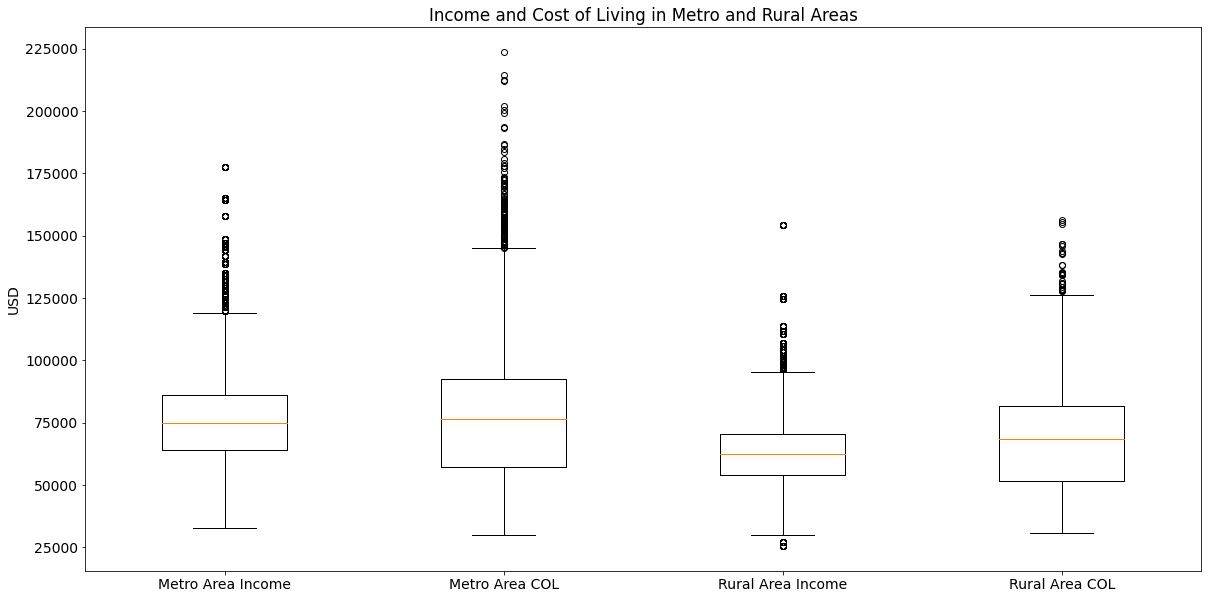

In [19]:
plt.figure(figsize=(20, 10))
plt.boxplot([metro_family_income, metro_cost_of_living, rural_family_income, rural_cost_of_living])
plt.ylabel("USD")
plt.xticks([1, 2, 3, 4], labels=["Metro Area Income", "Metro Area COL", "Rural Area Income", "Rural Area COL"])
plt.title("Income and Cost of Living in Metro and Rural Areas")
plt.show()

In [20]:
family_size = ["1p0c", "1p1c", "2p0c", "1p2c", "2p1c", "1p3c", "2p2c", "1p4c", "2p3c", "2p4c"]

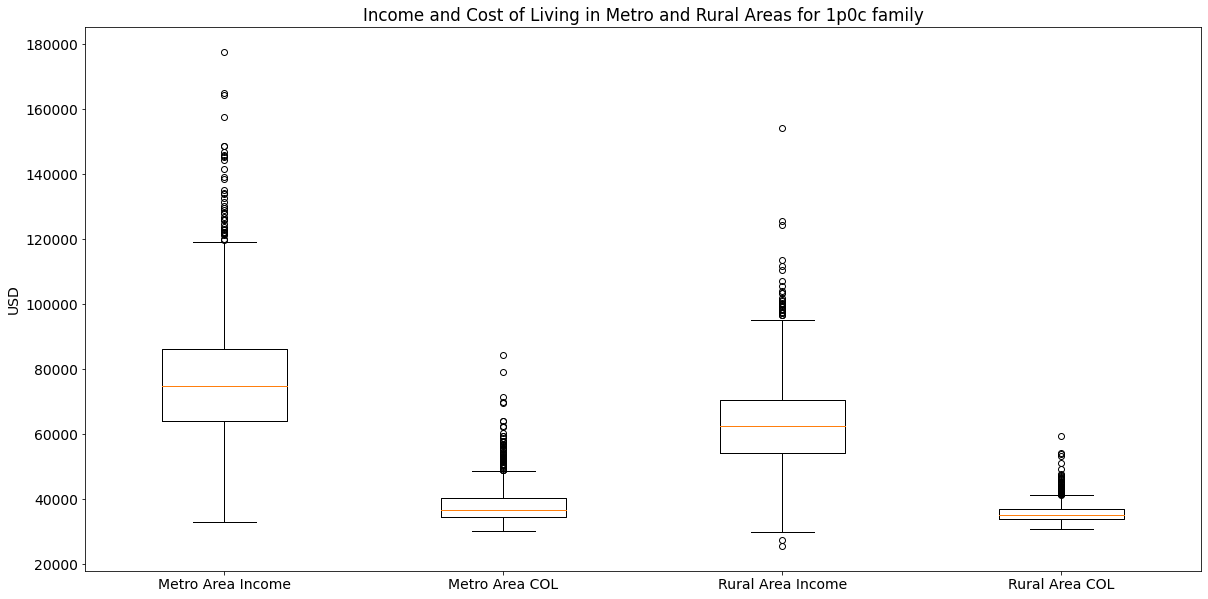

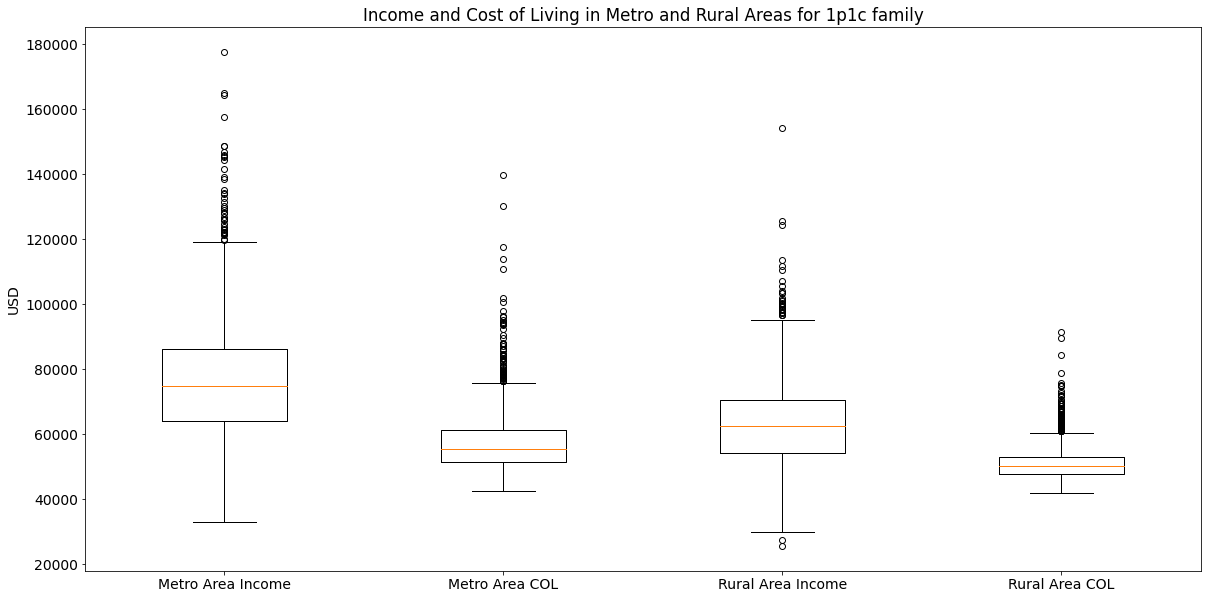

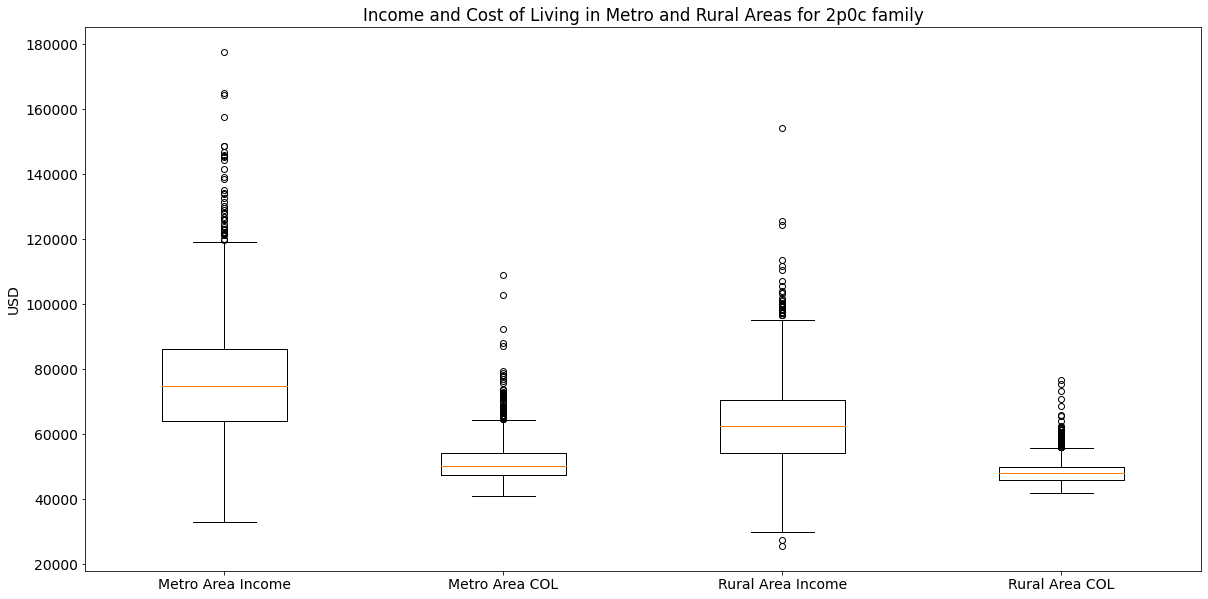

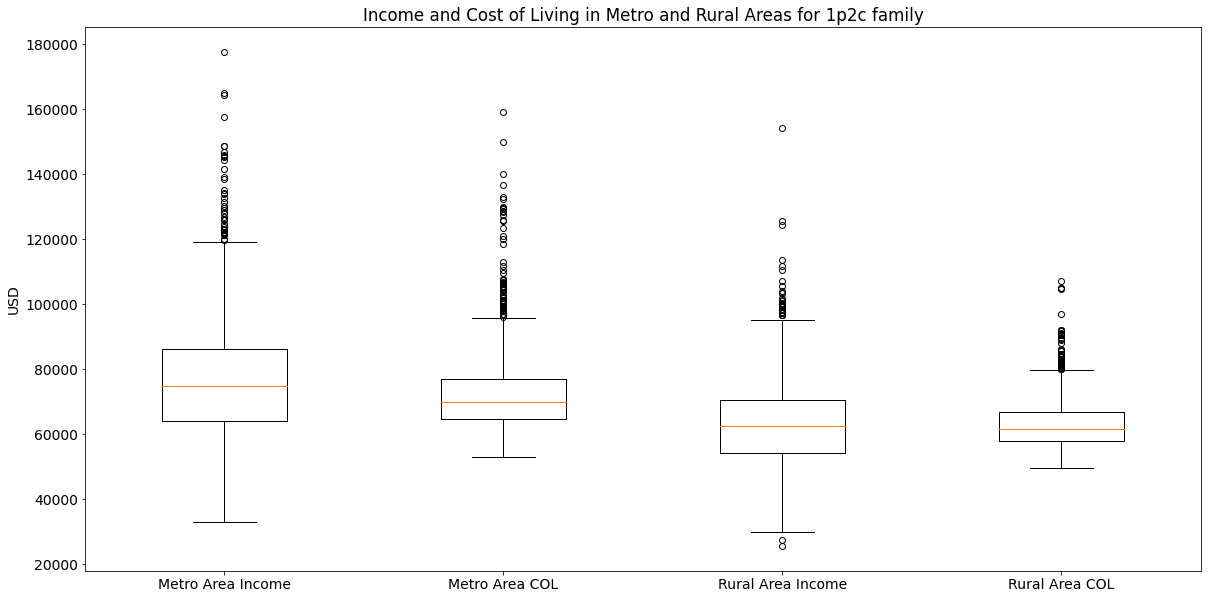

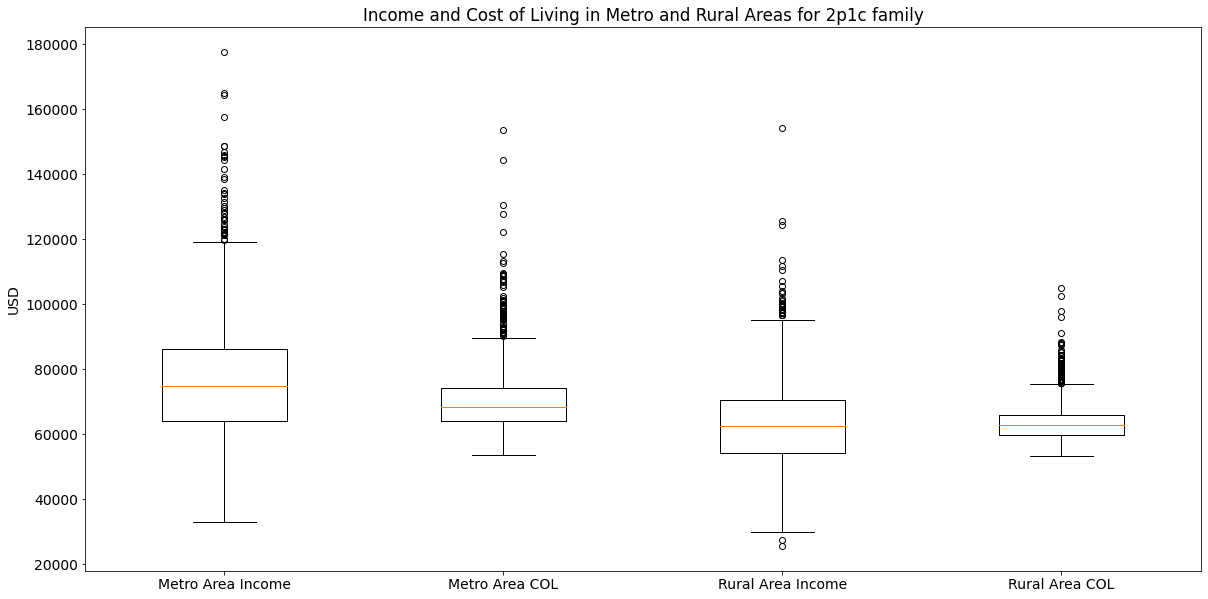

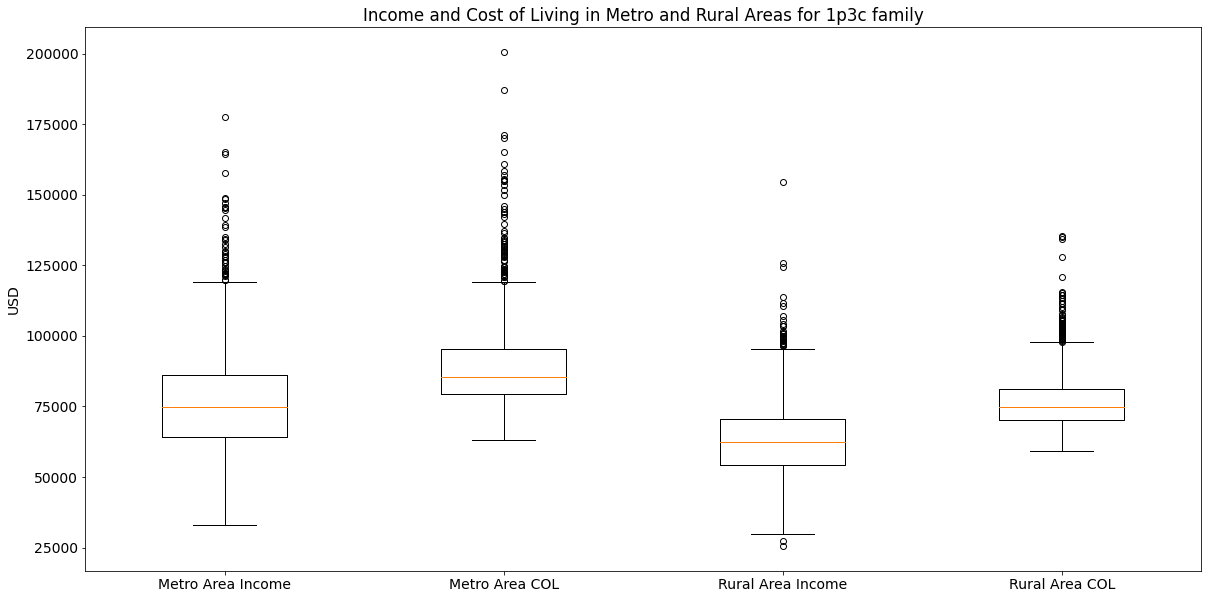

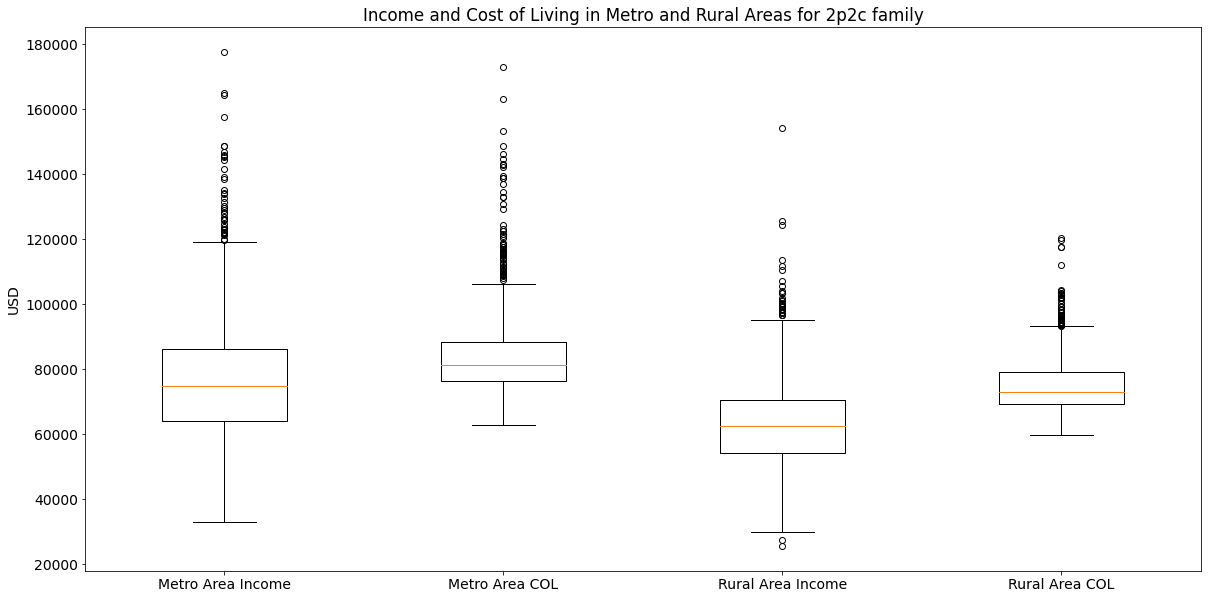

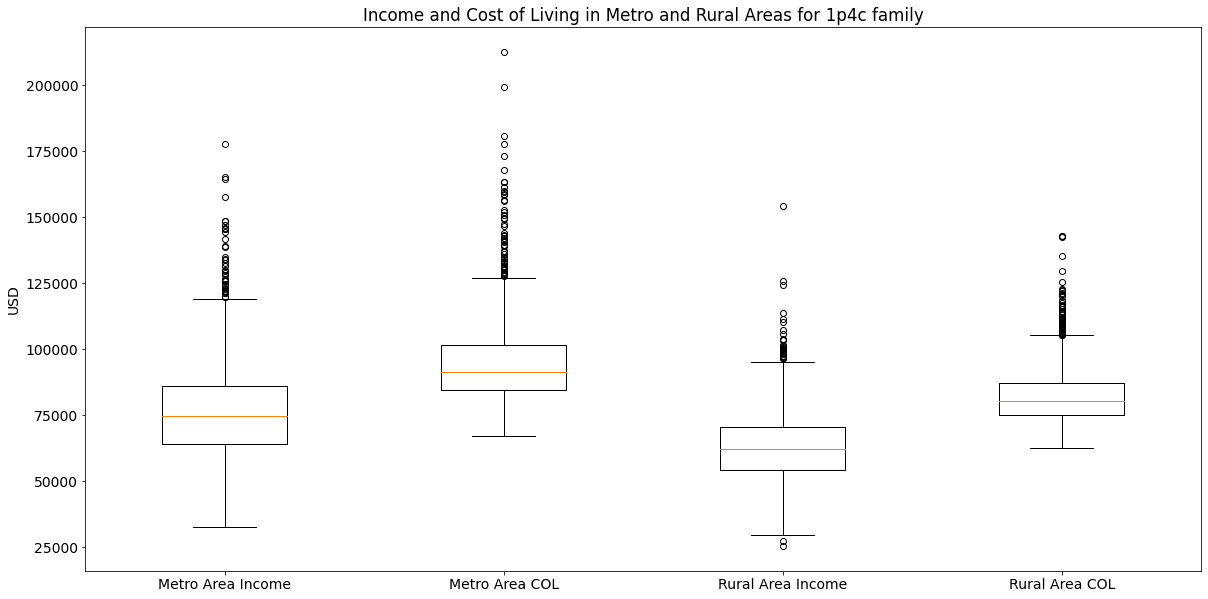

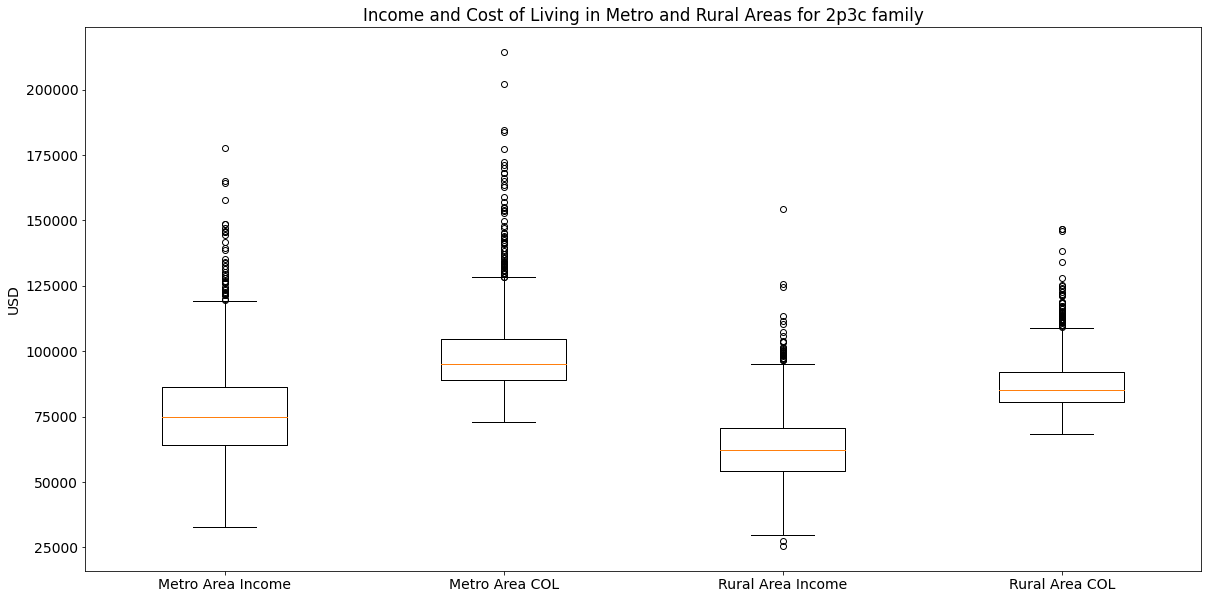

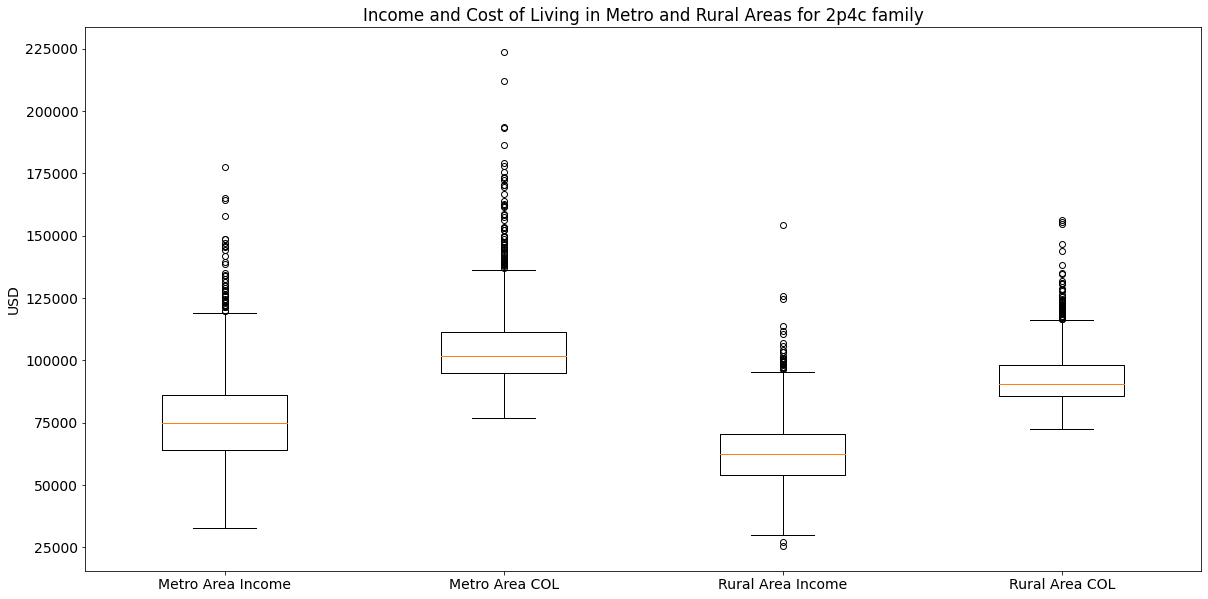

In [21]:
for fs in family_size:
    metro_income = np.array(df[(df["isMetro"] == True) & (df["family_member_count"] == fs)]["median_family_income"])
    metro_col = np.array(df[(df["isMetro"] == True) & (df["family_member_count"] == fs)]["total_cost"])
    rural_income = np.array(df[(df["isMetro"] == False) & (df["family_member_count"] == fs)]["median_family_income"])
    rural_col = np.array(df[(df["isMetro"] == False) & (df["family_member_count"] == fs)]["total_cost"])
    plt.figure(figsize=(20, 10))
    plt.boxplot([metro_income, metro_col, rural_income, rural_col])
    plt.ylabel("USD")
    plt.xticks([1, 2, 3, 4], labels=["Metro Area Income", "Metro Area COL", "Rural Area Income", "Rural Area COL"])
    plt.title(f"Income and Cost of Living in Metro and Rural Areas for {fs} family")
    plt.show()

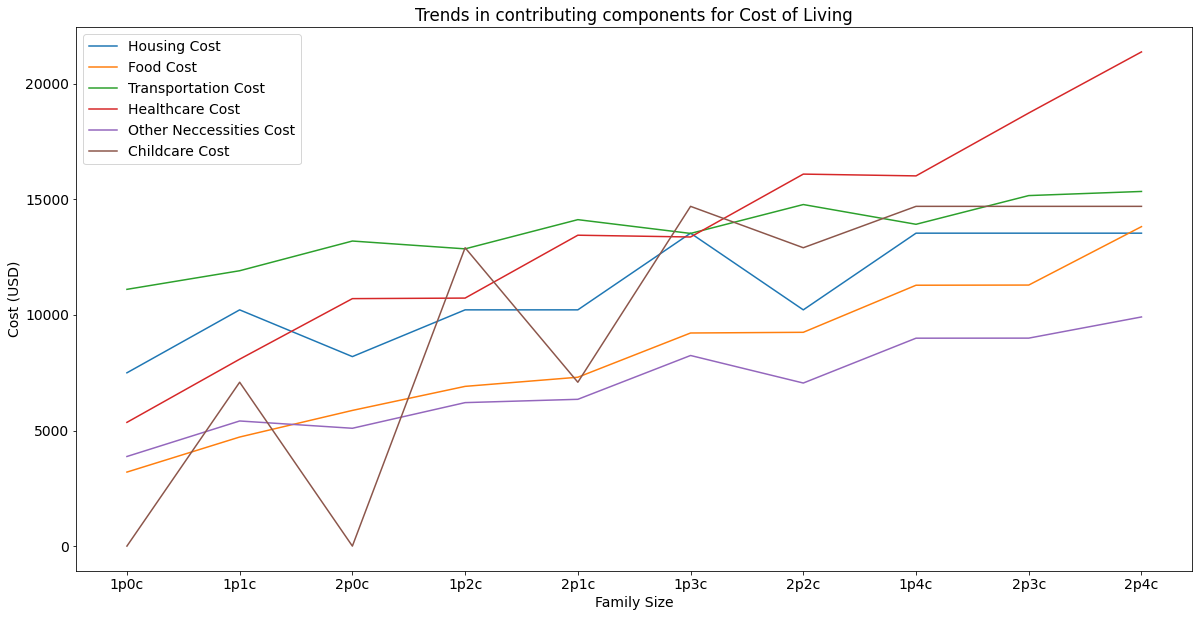

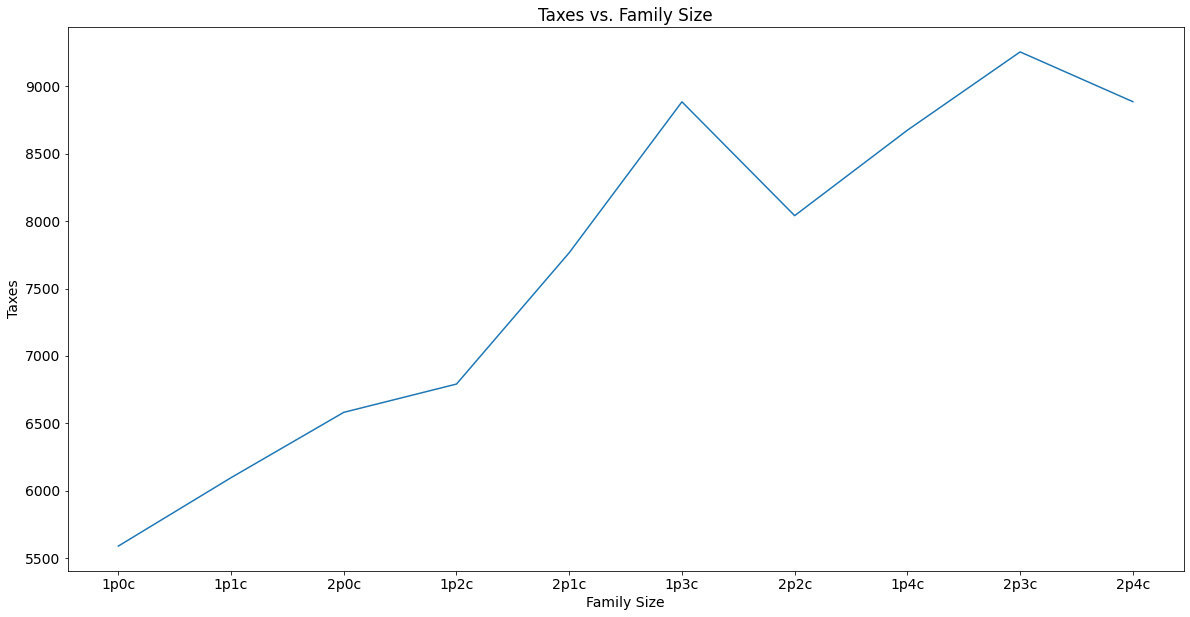

In [22]:
housing = []
food = []
transportation = []
healthcare = []
other = []
childcare = []
taxes = []

for fs in family_size:
    housing.append(np.array(df[(df["family_member_count"] == fs)]["housing_cost"]).mean())
    food.append(np.array(df[(df["family_member_count"] == fs)]["food_cost"]).mean())
    transportation.append(np.array(df[(df["family_member_count"] == fs)]["transportation_cost"]).mean())
    healthcare.append(np.array(df[(df["family_member_count"] == fs)]["healthcare_cost"]).mean())
    other.append(np.array(df[(df["family_member_count"] == fs)]["other_necessities_cost"]).mean())
    childcare.append(np.array(df[(df["family_member_count"] == fs)]["childcare_cost"]).mean())
    taxes.append(np.array(df[(df["family_member_count"] == fs)]["taxes"]).mean())

plt.figure(figsize=(20,10))
plt.plot(family_size, housing, label="Housing Cost")
plt.plot(family_size, food, label="Food Cost")
plt.plot(family_size, transportation, label="Transportation Cost")
plt.plot(family_size, healthcare, label="Healthcare Cost")
plt.plot(family_size, other, label="Other Neccessities Cost")
plt.plot(family_size, childcare, label="Childcare Cost")
plt.xlabel("Family Size")
plt.ylabel("Cost (USD)")
plt.legend()
plt.title("Trends in contributing components for Cost of Living")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(family_size, taxes)
plt.xlabel("Family Size")
plt.ylabel("Taxes")
plt.title("Taxes vs. Family Size")
plt.show()

## Affordability Analysis

In [23]:
modified_df = df.assign(affordability_ratio=lambda x: x.median_family_income / x.total_cost)

In [24]:
most_affordable_counties_us = modified_df.nlargest(10, "affordability_ratio")
least_affordable_counties_us = modified_df.nsmallest(10, "affordability_ratio")

In [25]:
def affordability_graphs(data, region, rank, fam_size):
    plt.figure(figsize=(20,10))
    sns.barplot(data=data, x="county", y="affordability_ratio", hue="isMetro", dodge=False, ci=None)
    plt.title(f"{rank} Affordable Counties in {region}   {fam_size}")
    plt.xticks(rotation=90)
    plt.show()

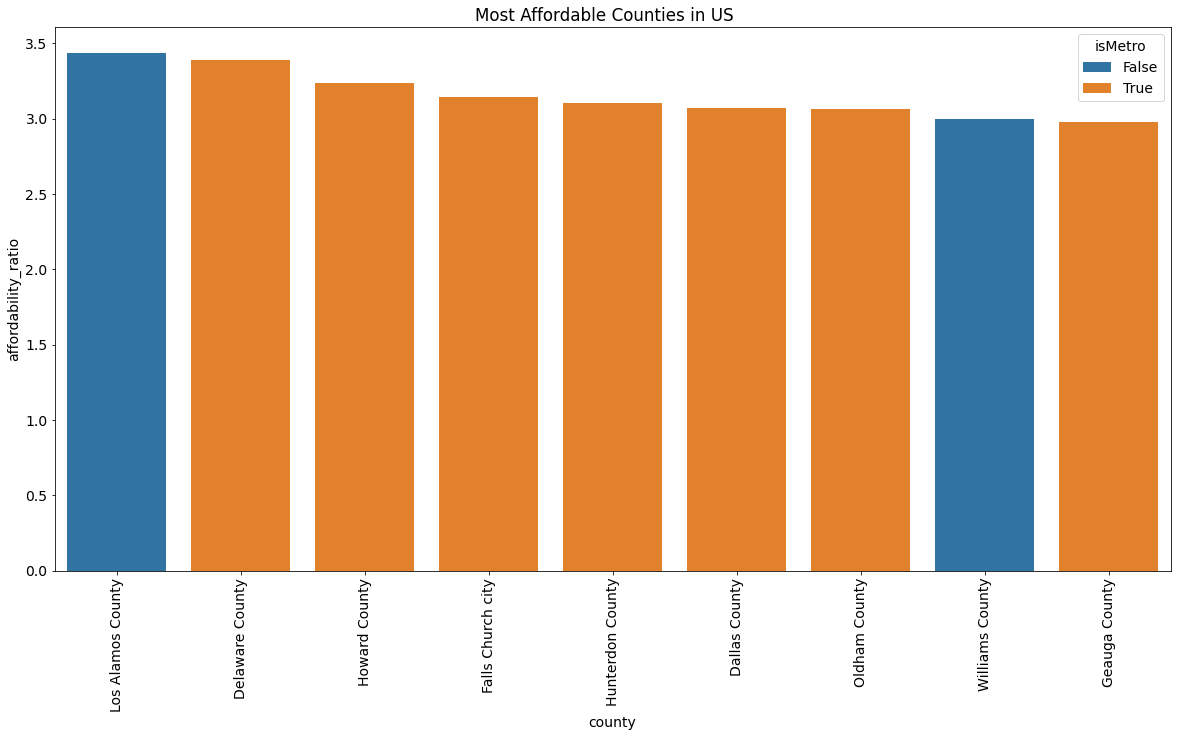

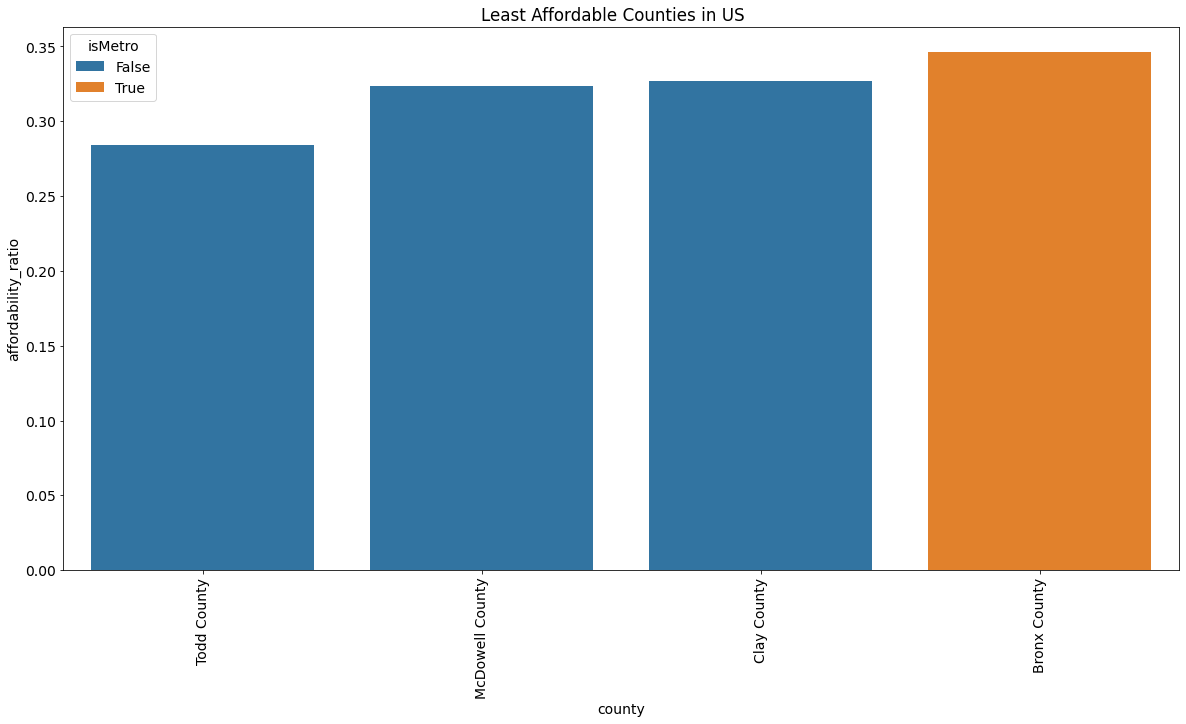

In [26]:
affordability_graphs(most_affordable_counties_us, "US", "Most", "")
affordability_graphs(least_affordable_counties_us, "US", "Least", "")

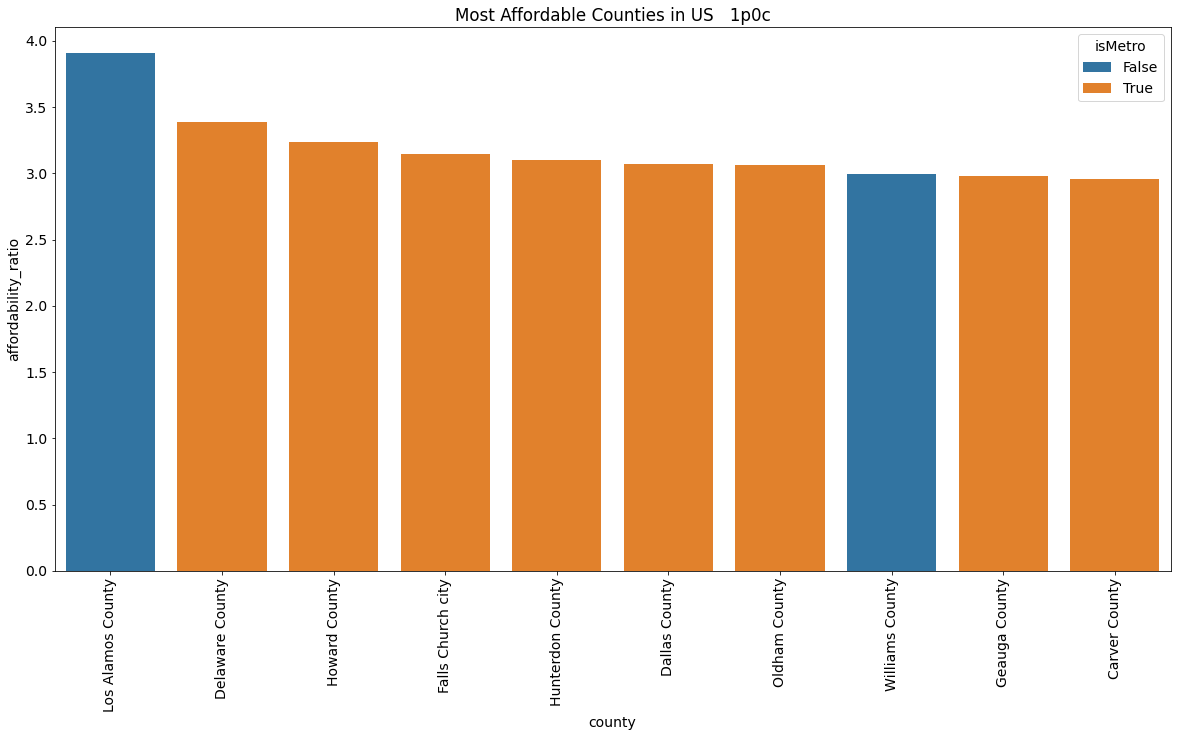

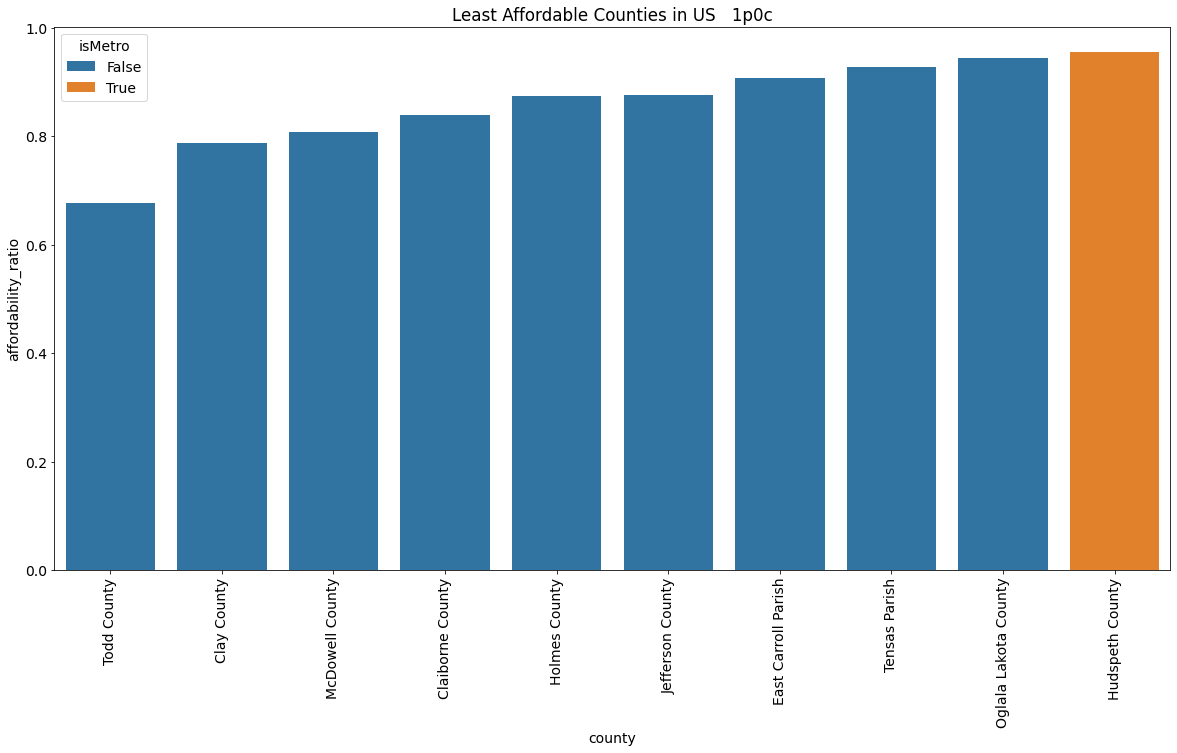

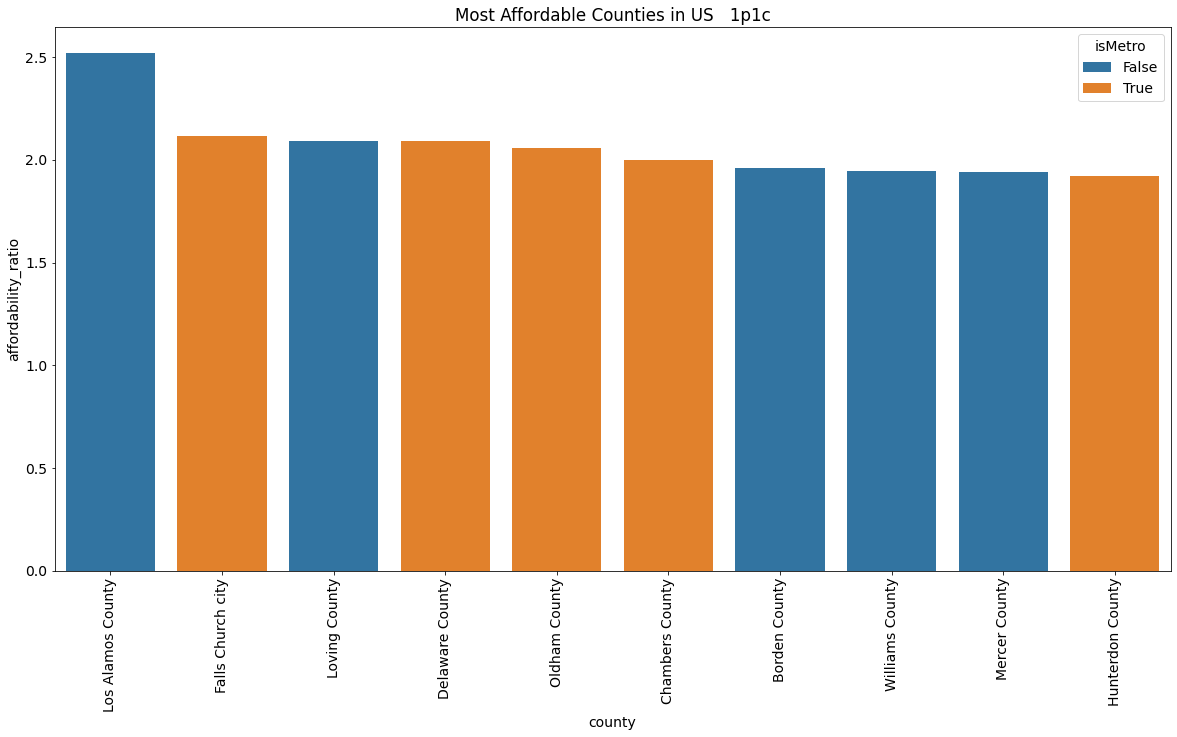

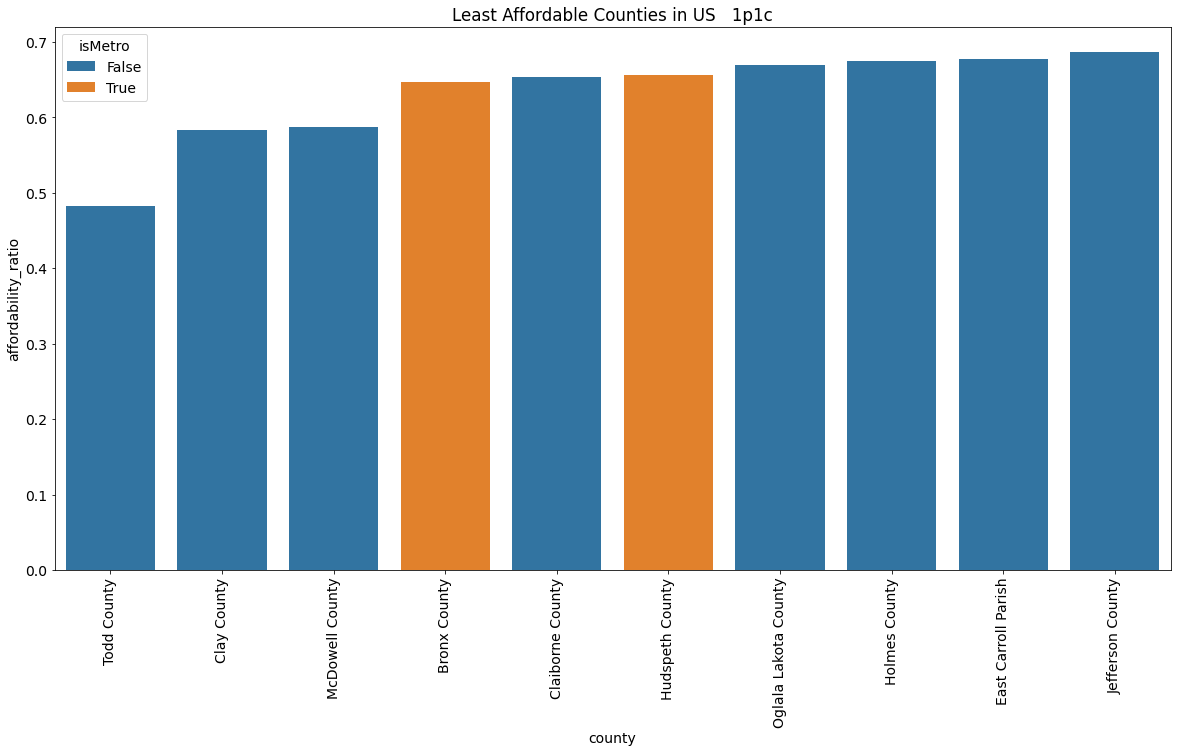

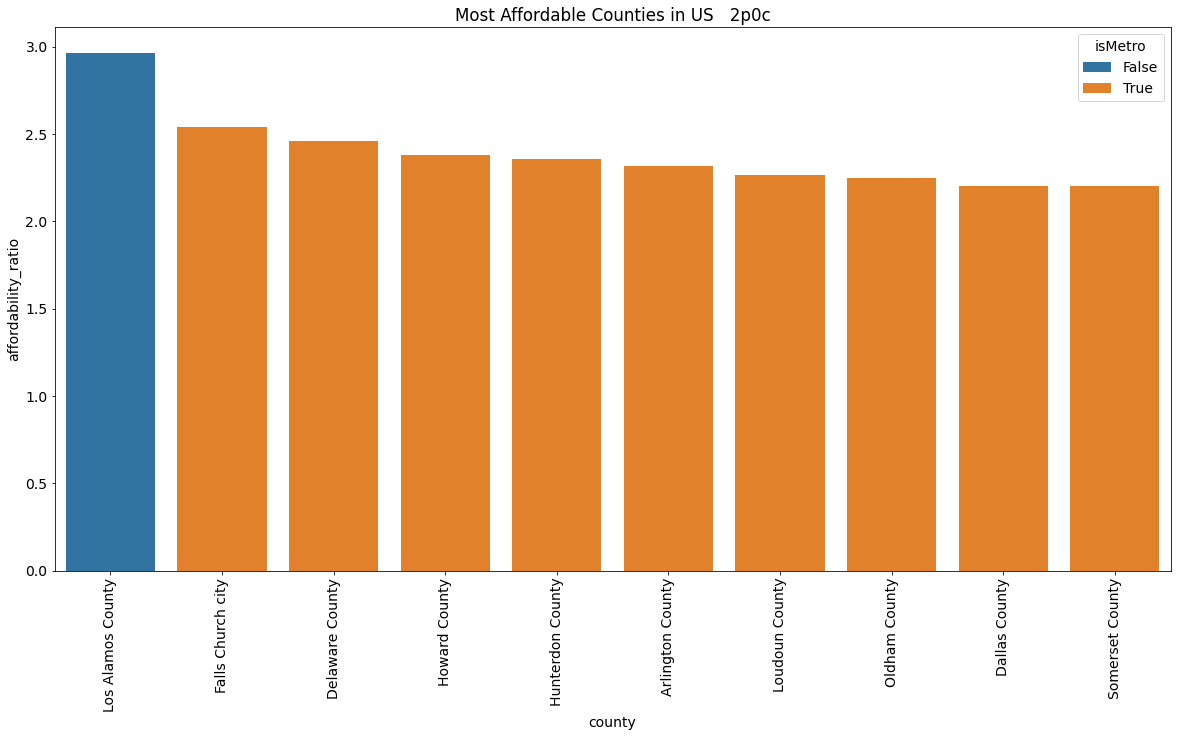

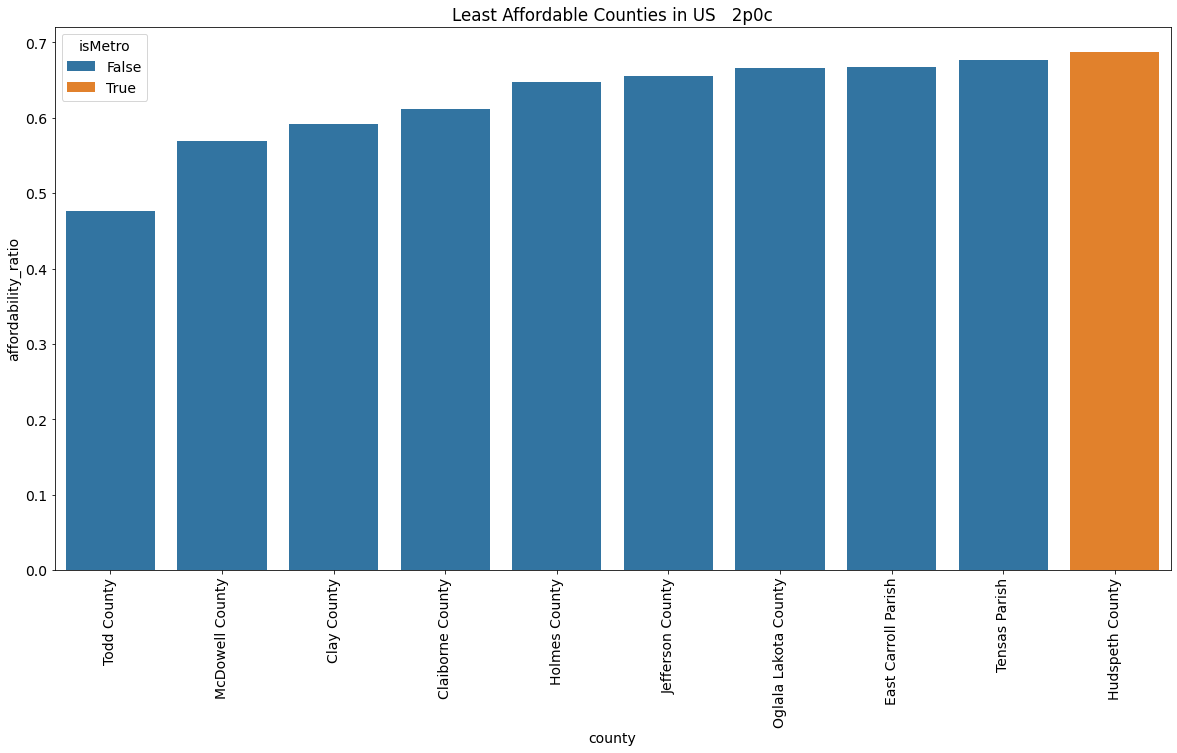

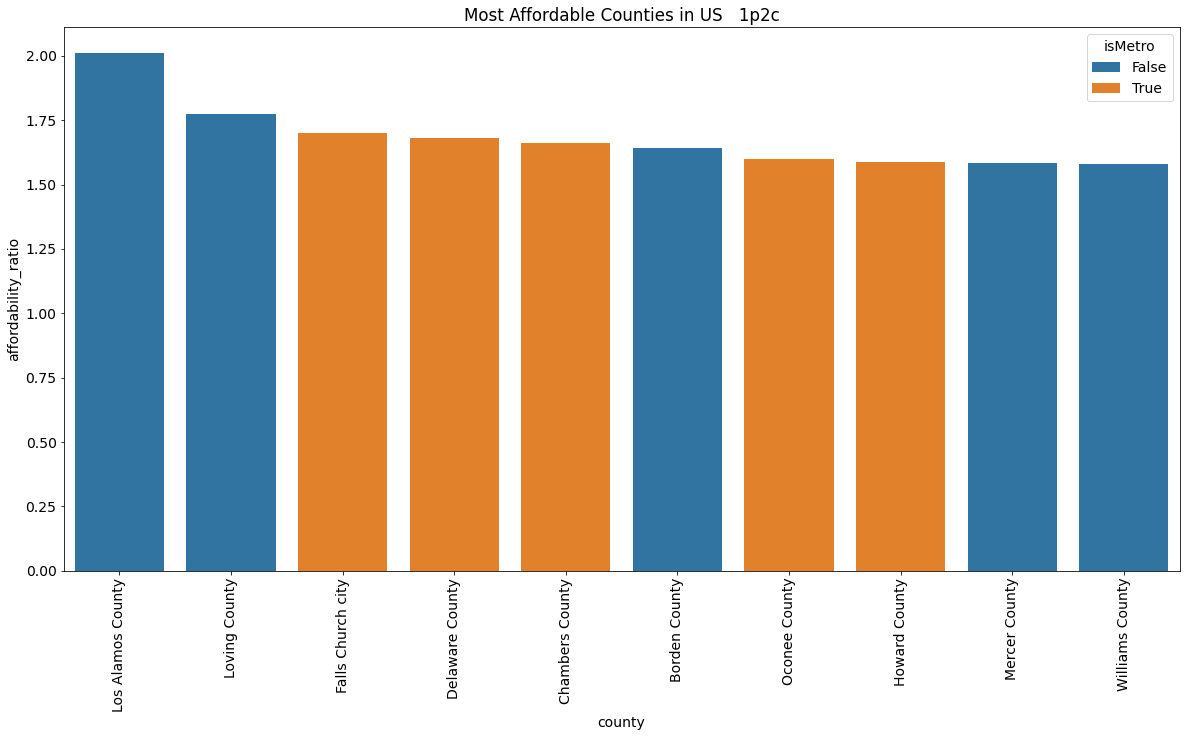

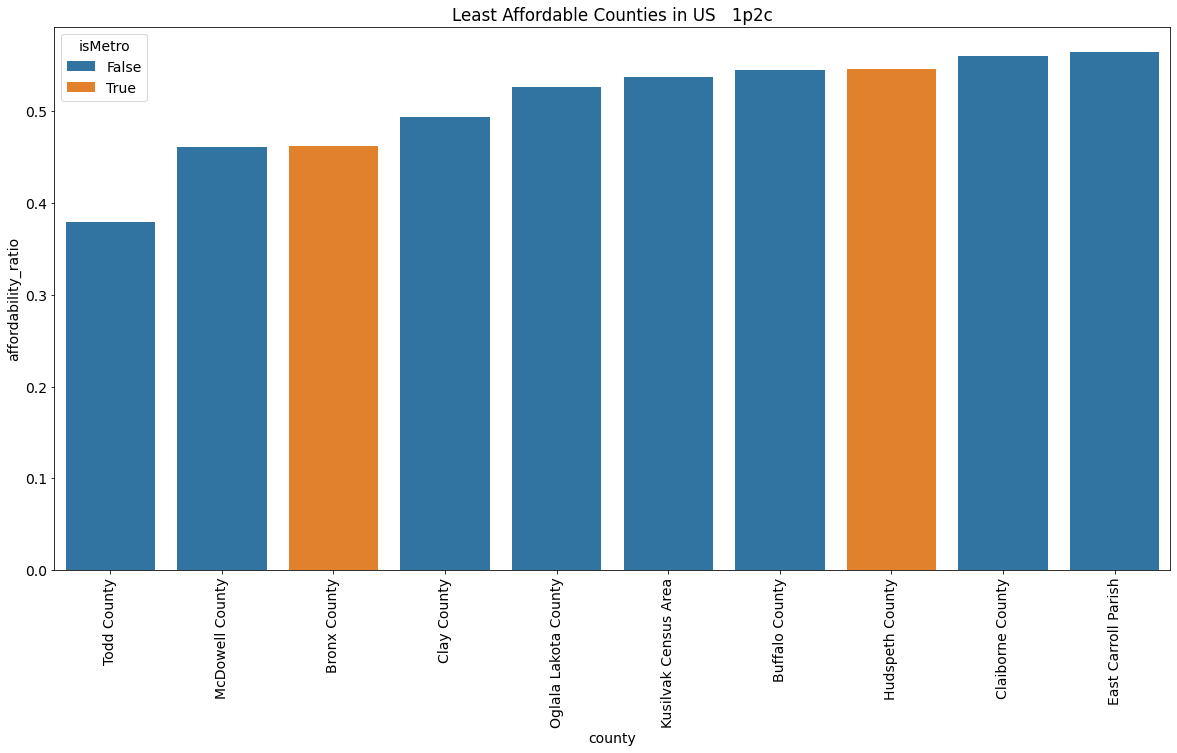

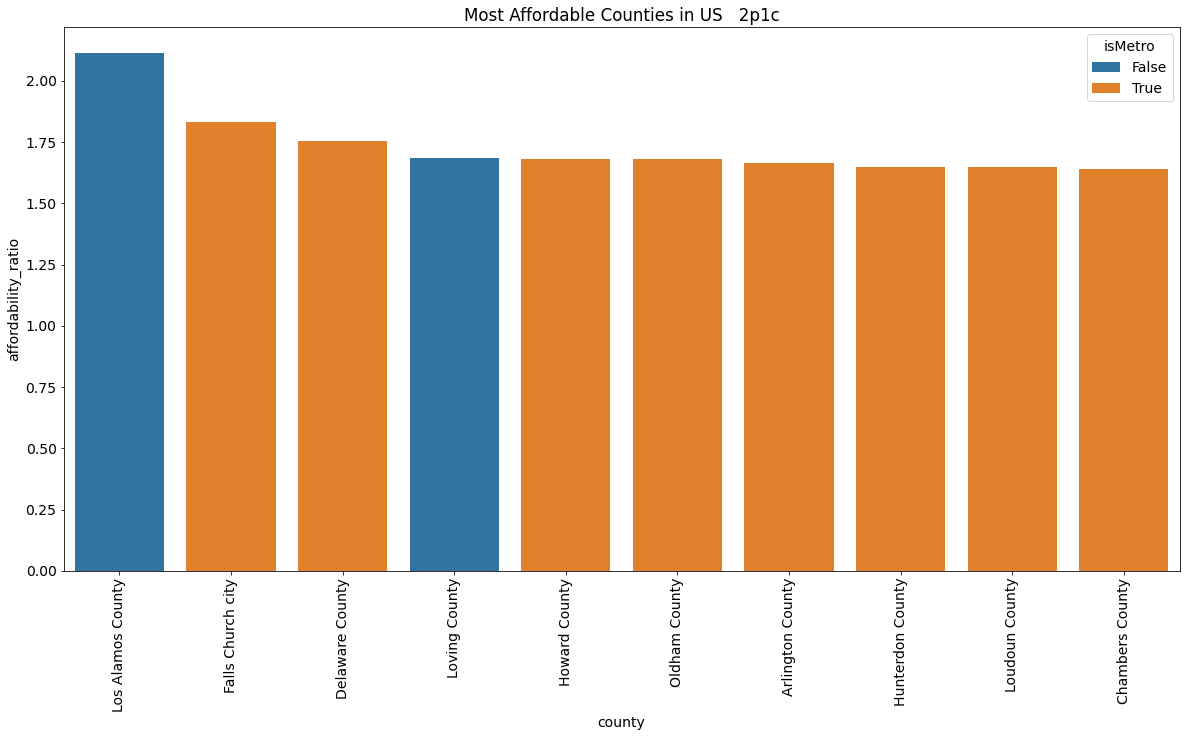

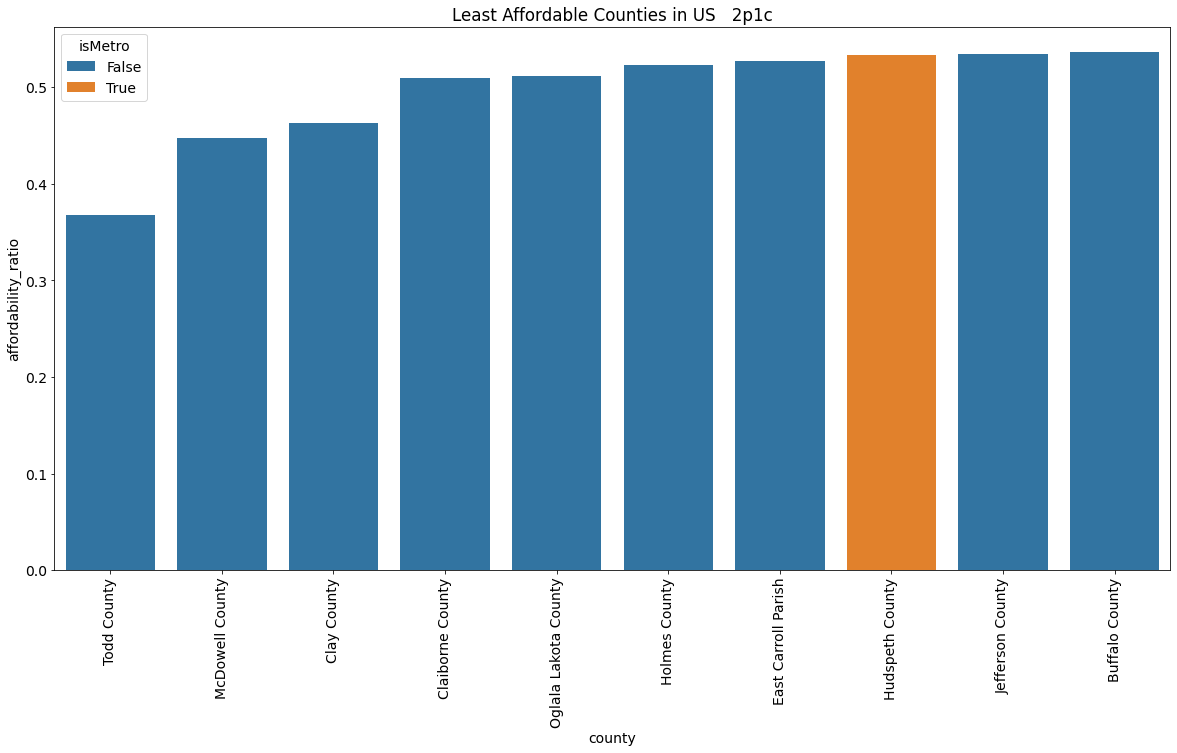

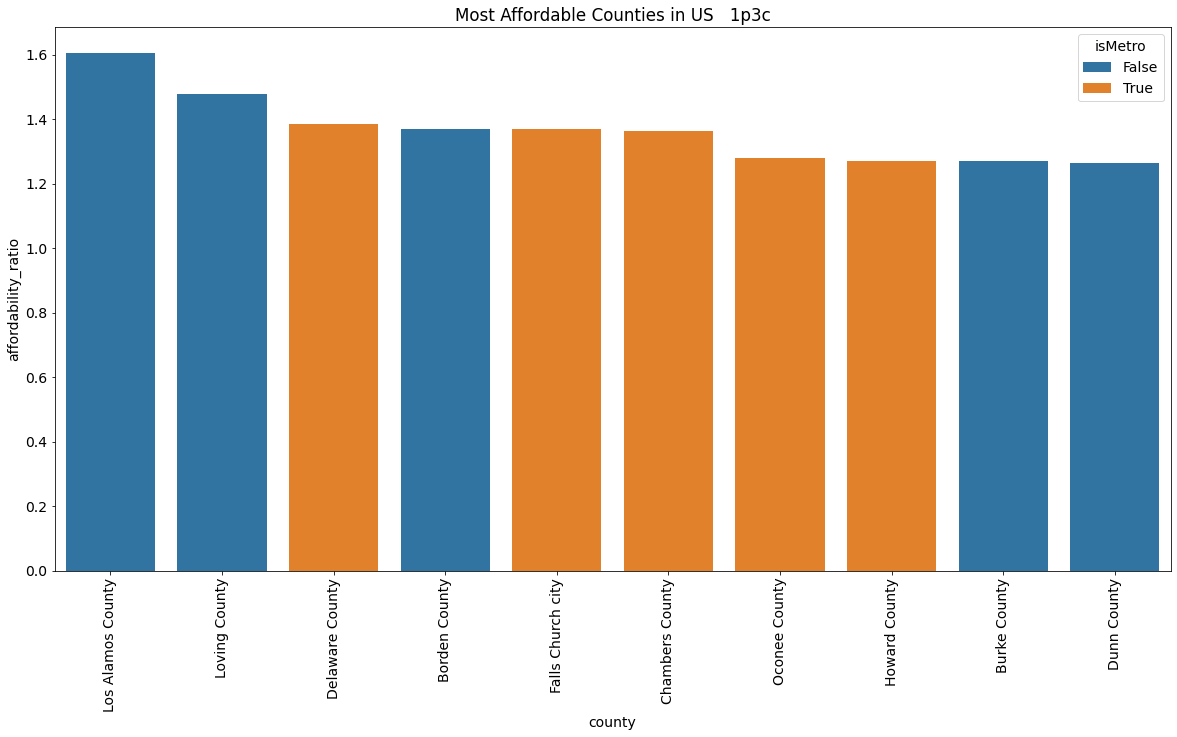

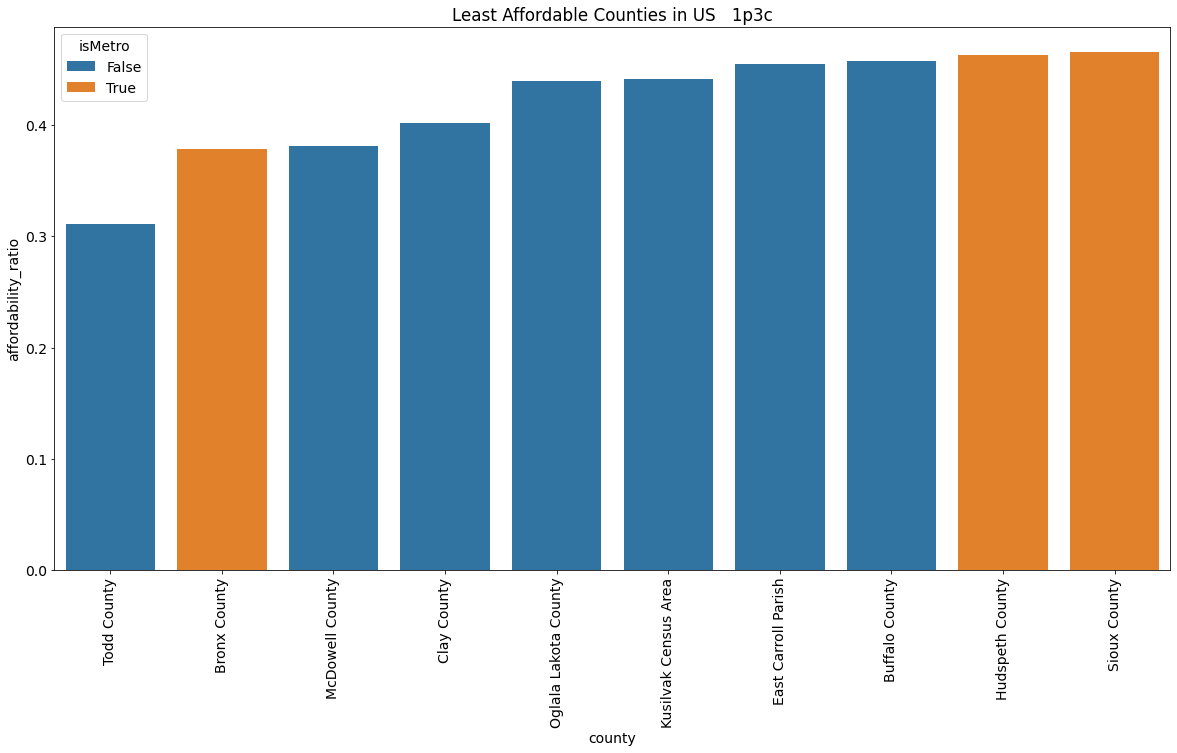

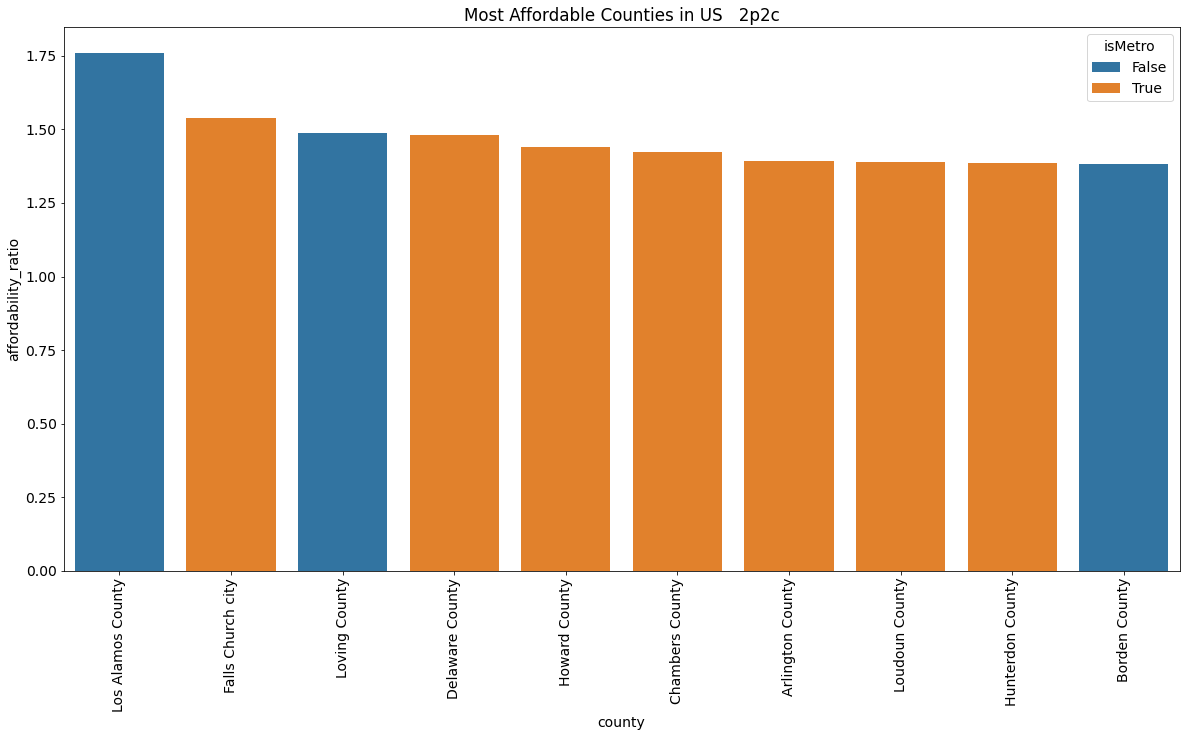

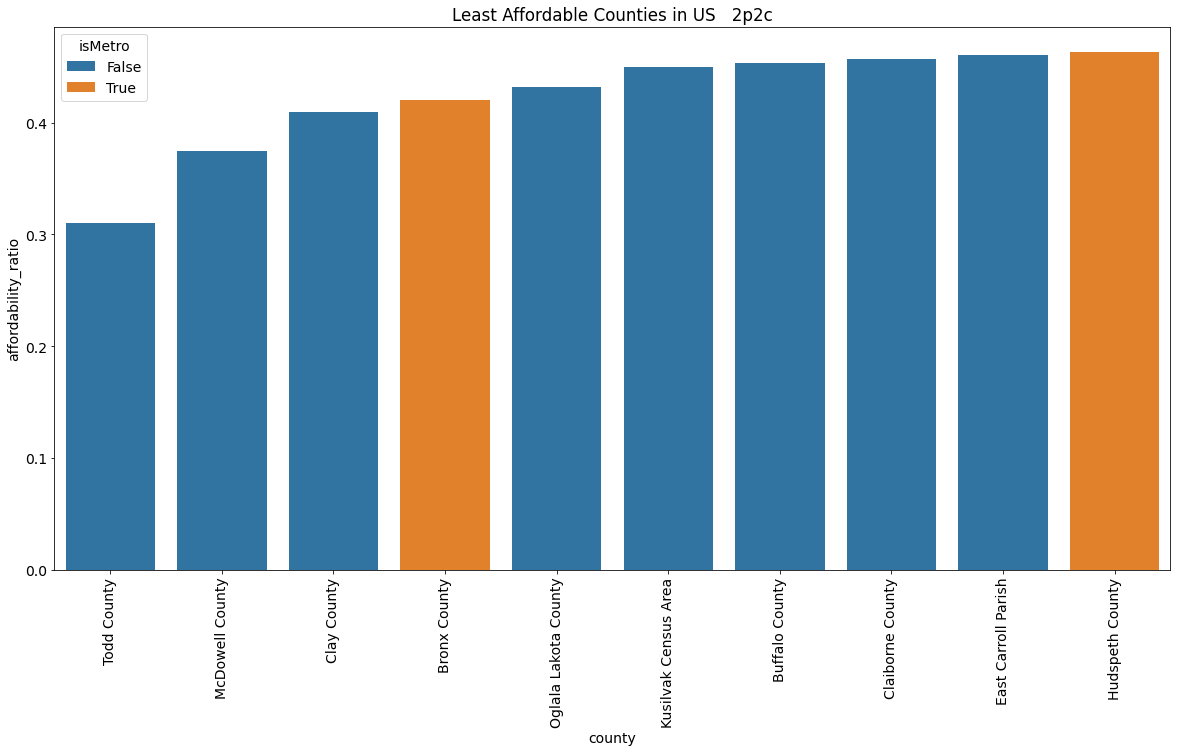

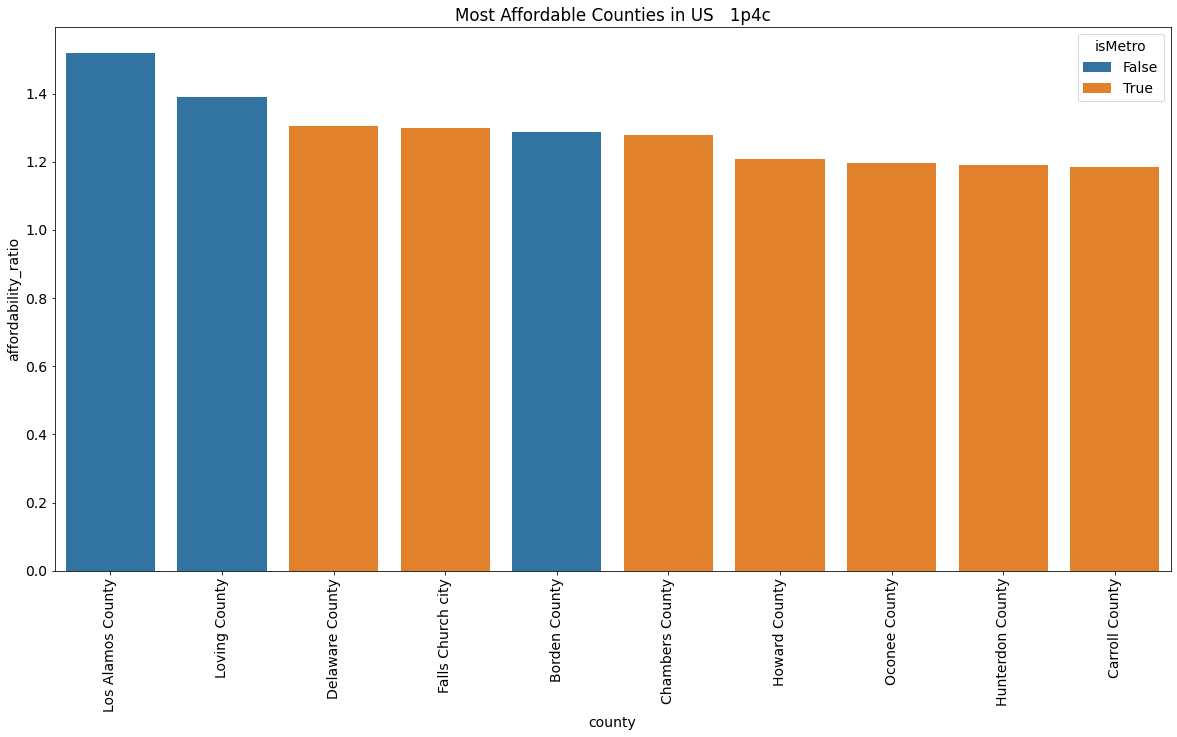

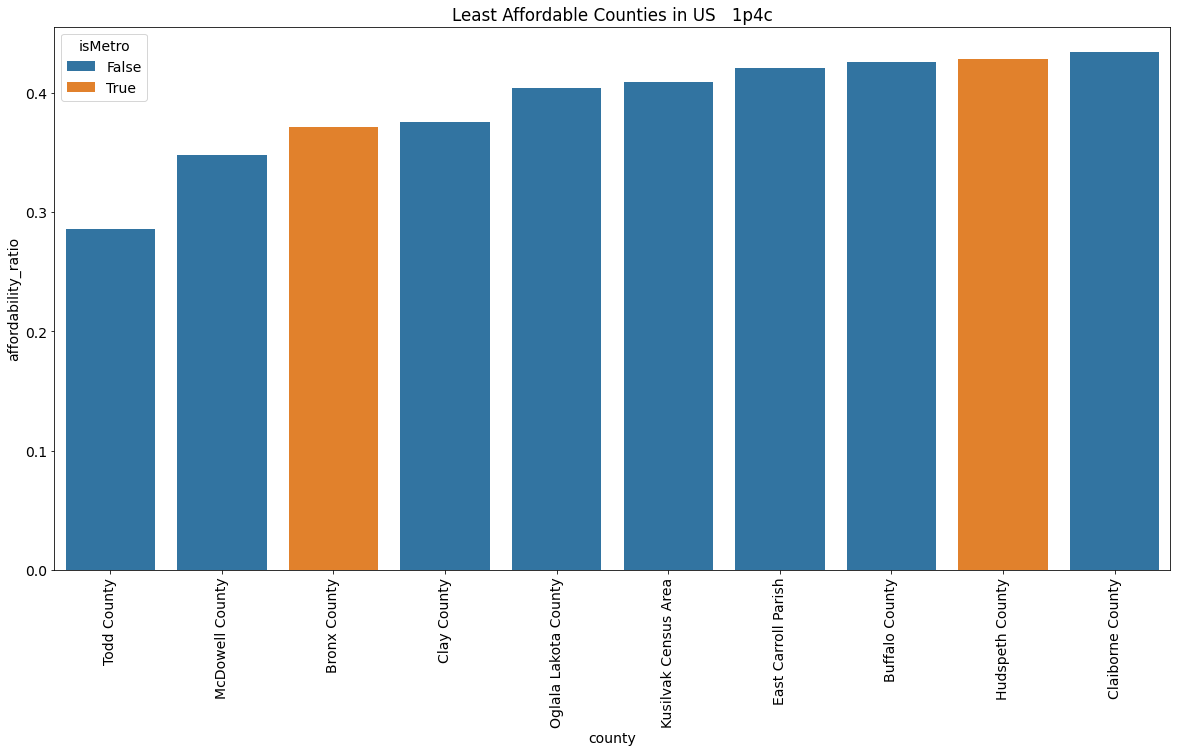

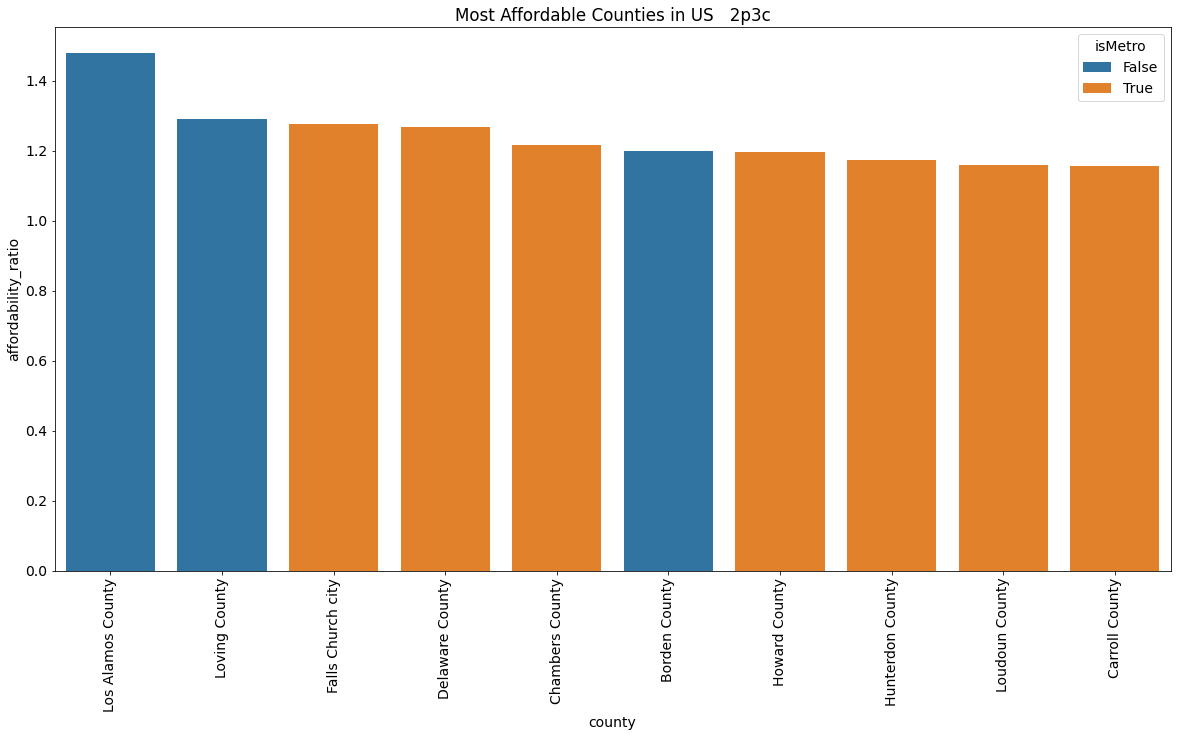

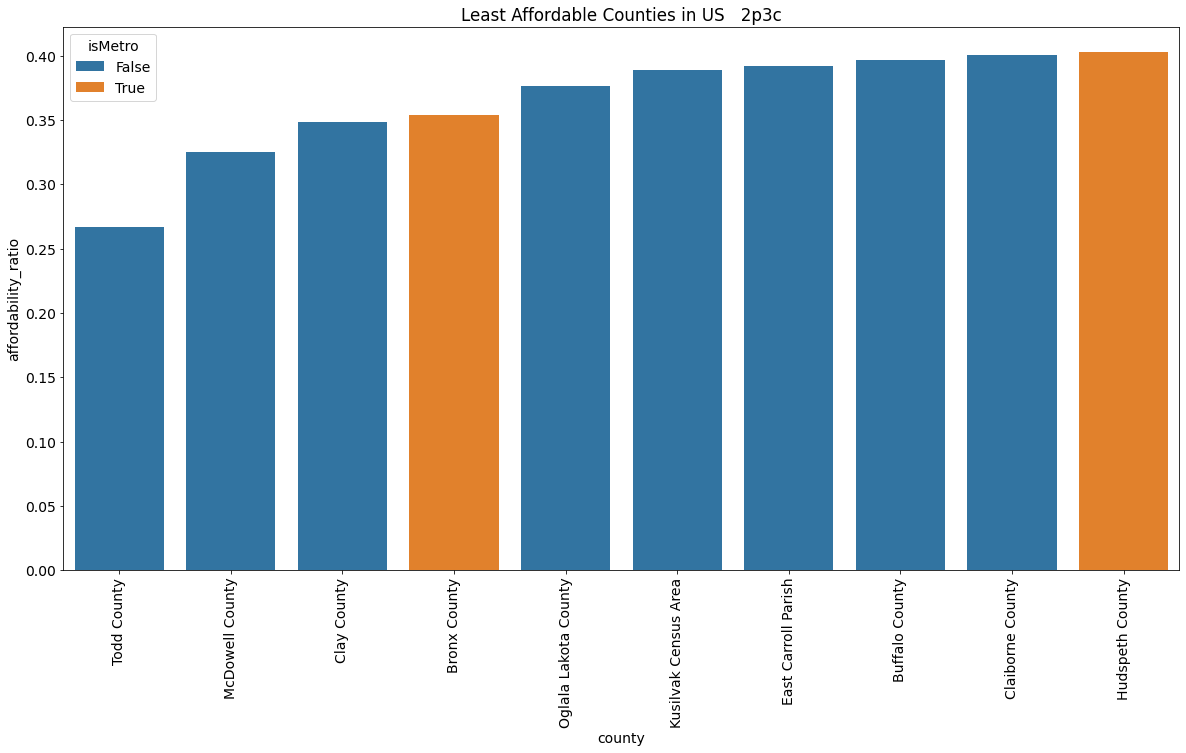

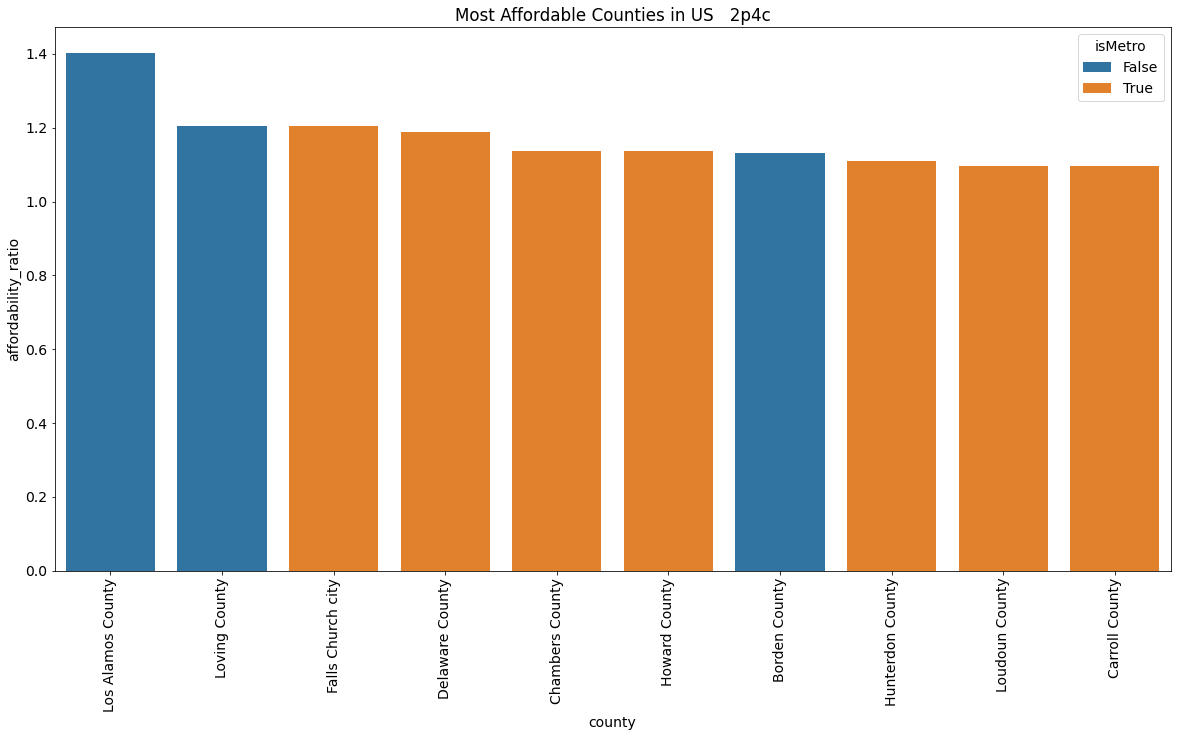

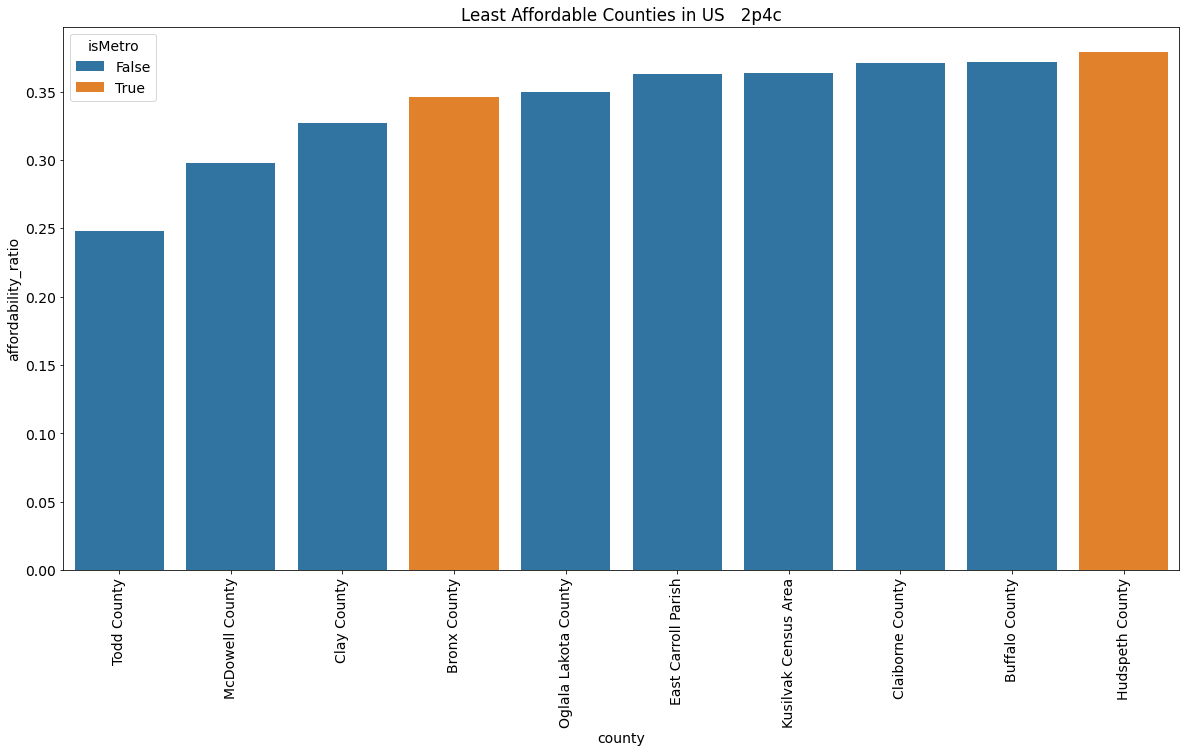

In [27]:
for fs in family_size:
    ds_df = modified_df[modified_df["family_member_count"] == fs]
    most_affordable = ds_df.nlargest(10, "affordability_ratio")
    least_affordable = ds_df.nsmallest(10, "affordability_ratio")
    affordability_graphs(most_affordable, "US", "Most", fs)
    affordability_graphs(least_affordable, "US", "Least", fs)

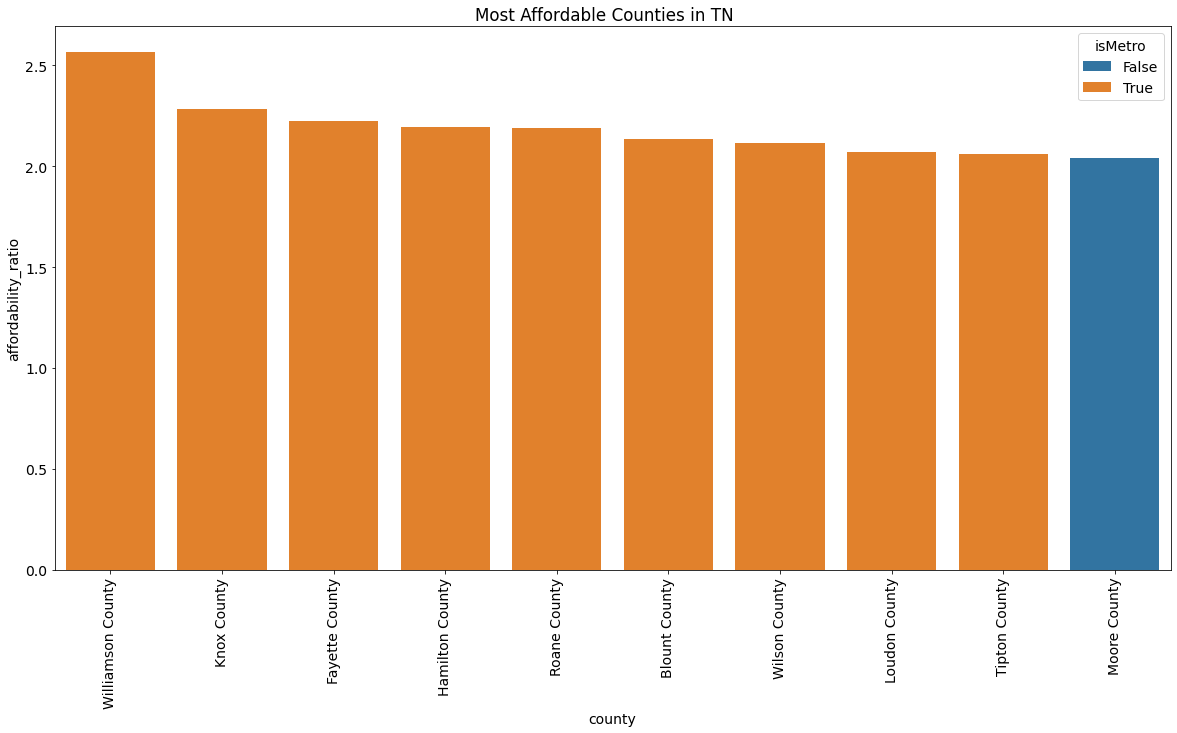

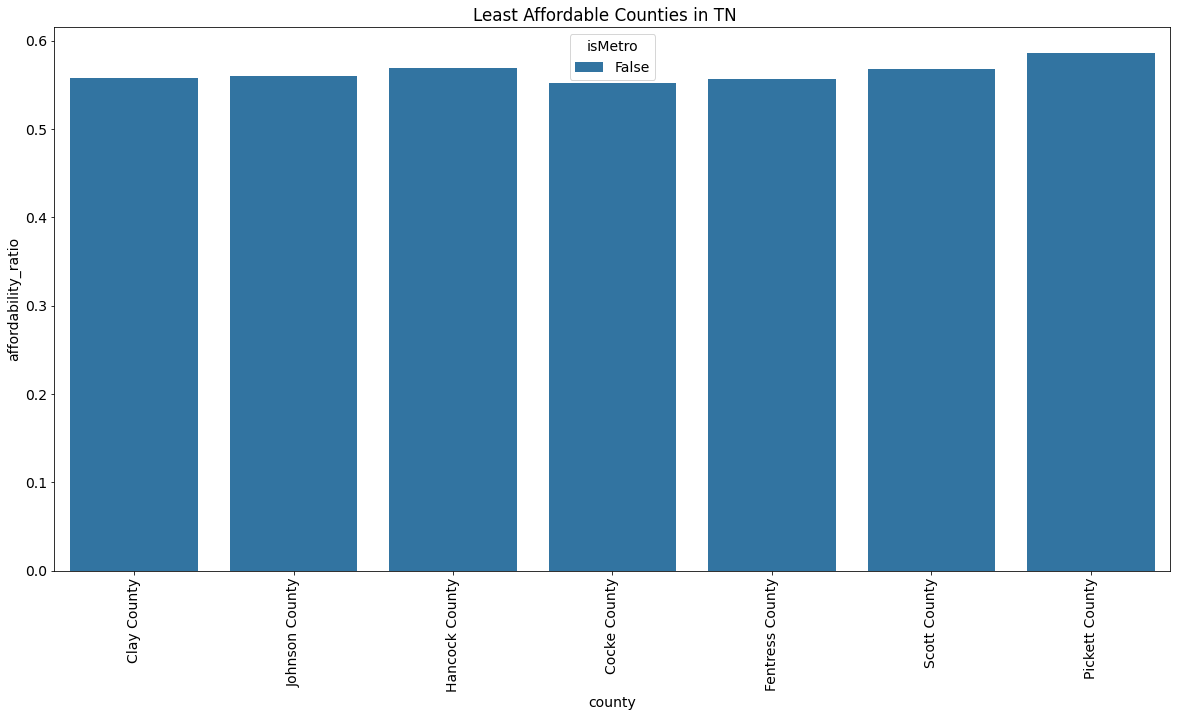

In [28]:
ds_df = modified_df[(modified_df["state"] == "TN")]
most_affordable = ds_df.nlargest(10, "affordability_ratio")
least_affordable = ds_df.nsmallest(10, "affordability_ratio")
affordability_graphs(most_affordable, "TN", "Most", "")
affordability_graphs(least_affordable, "TN", "Least", "")

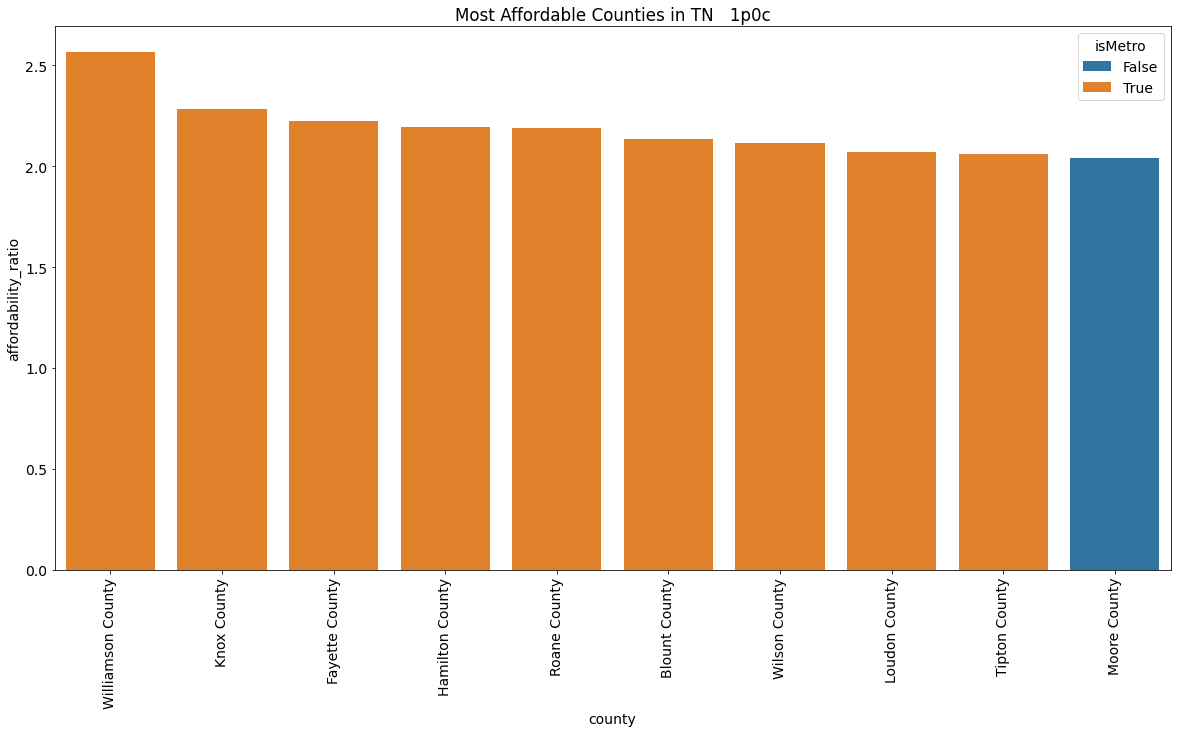

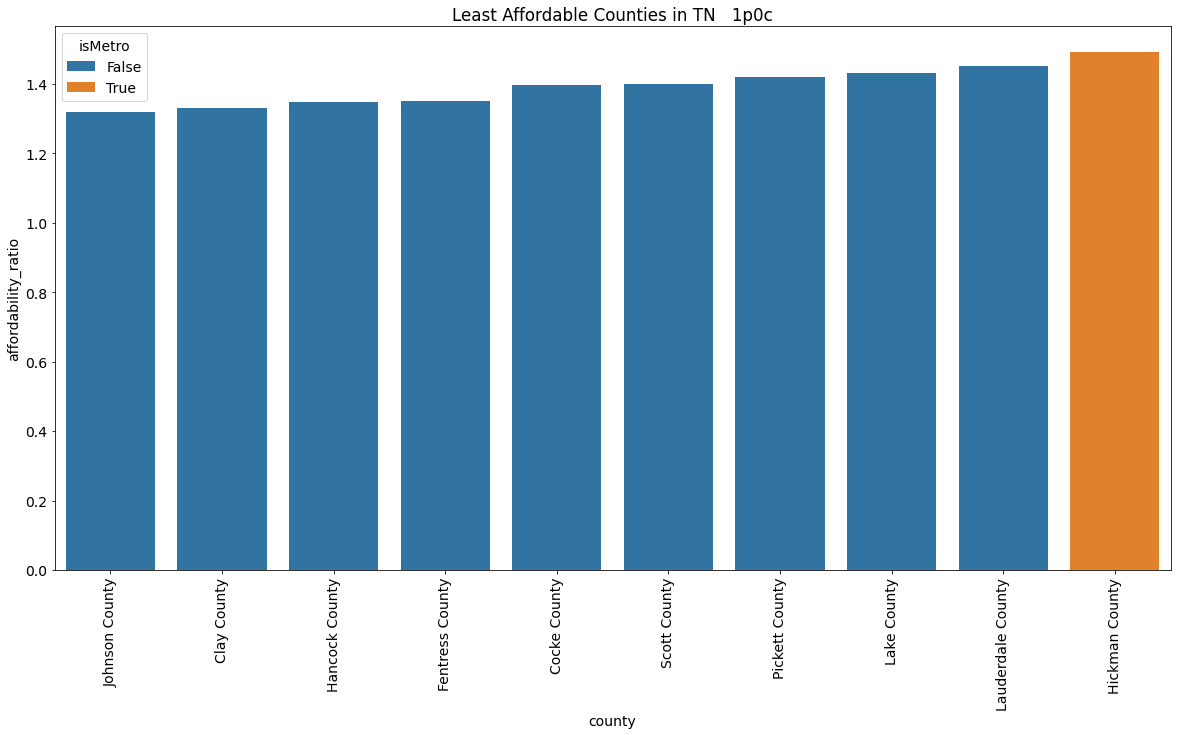

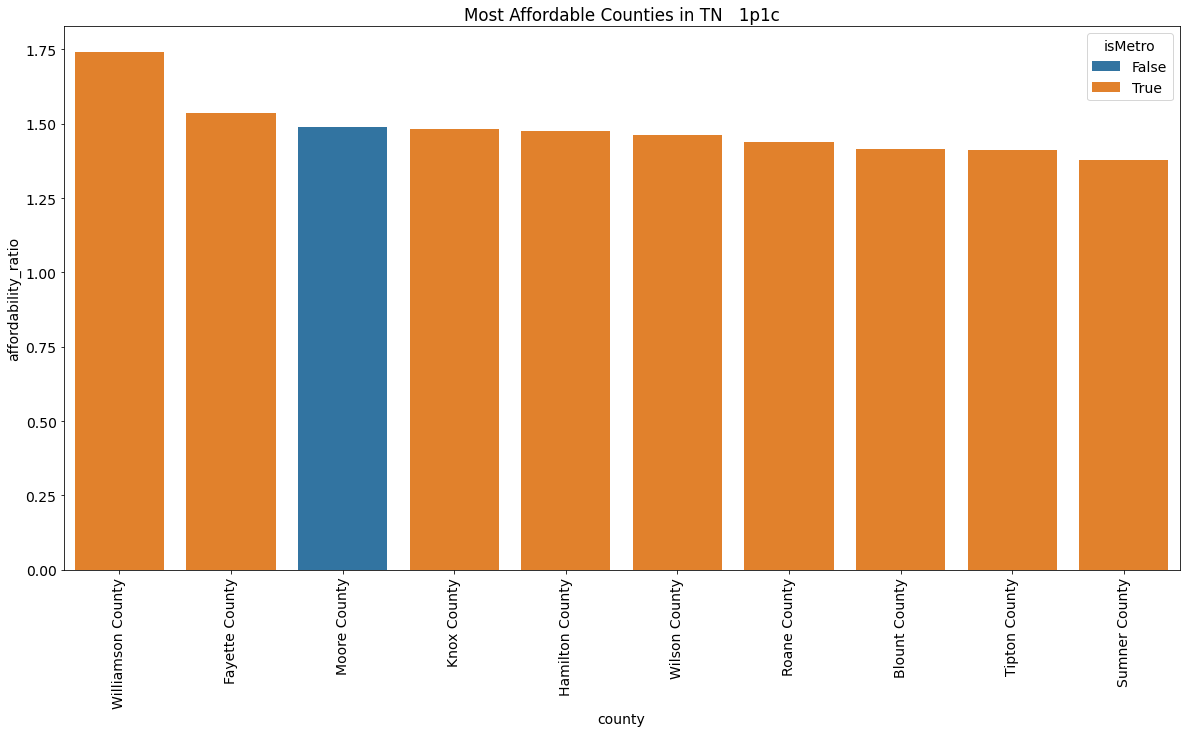

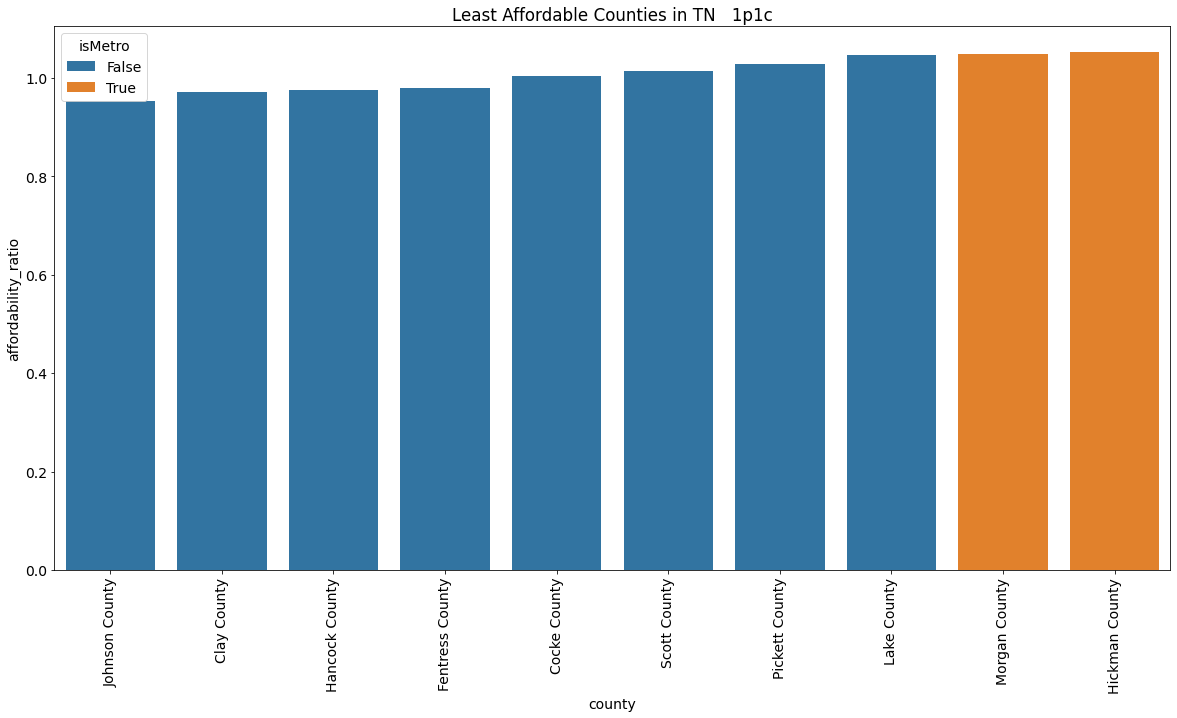

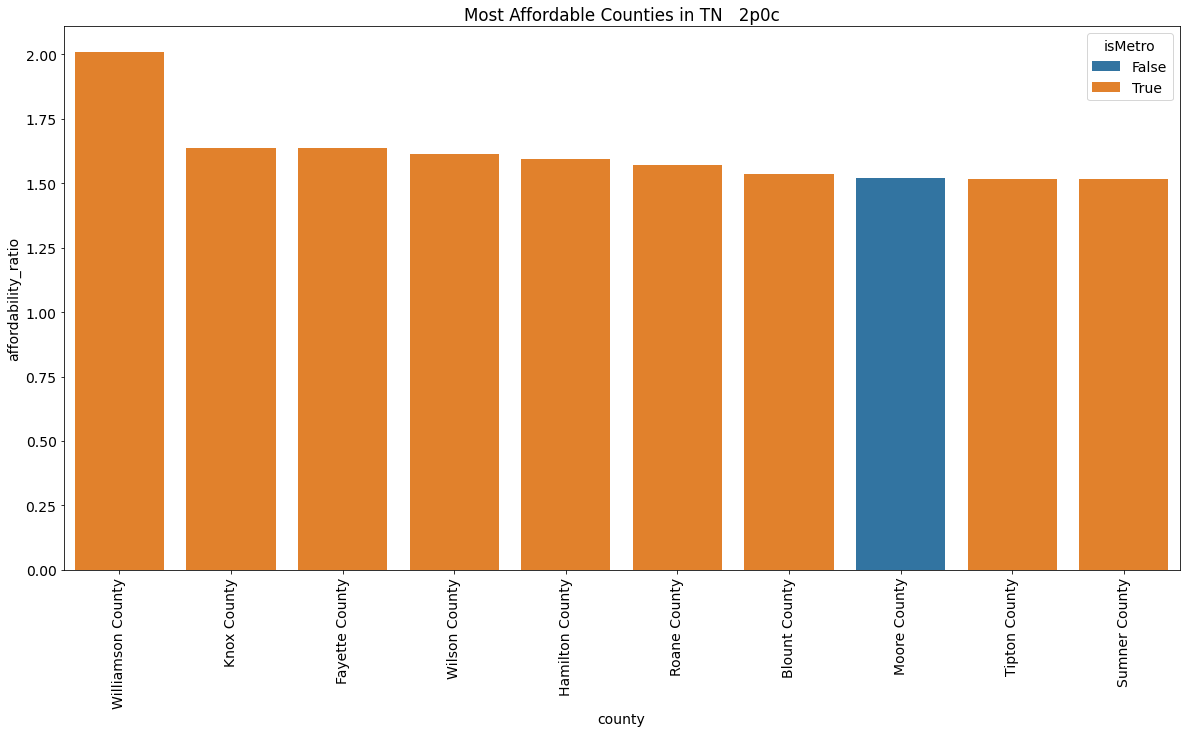

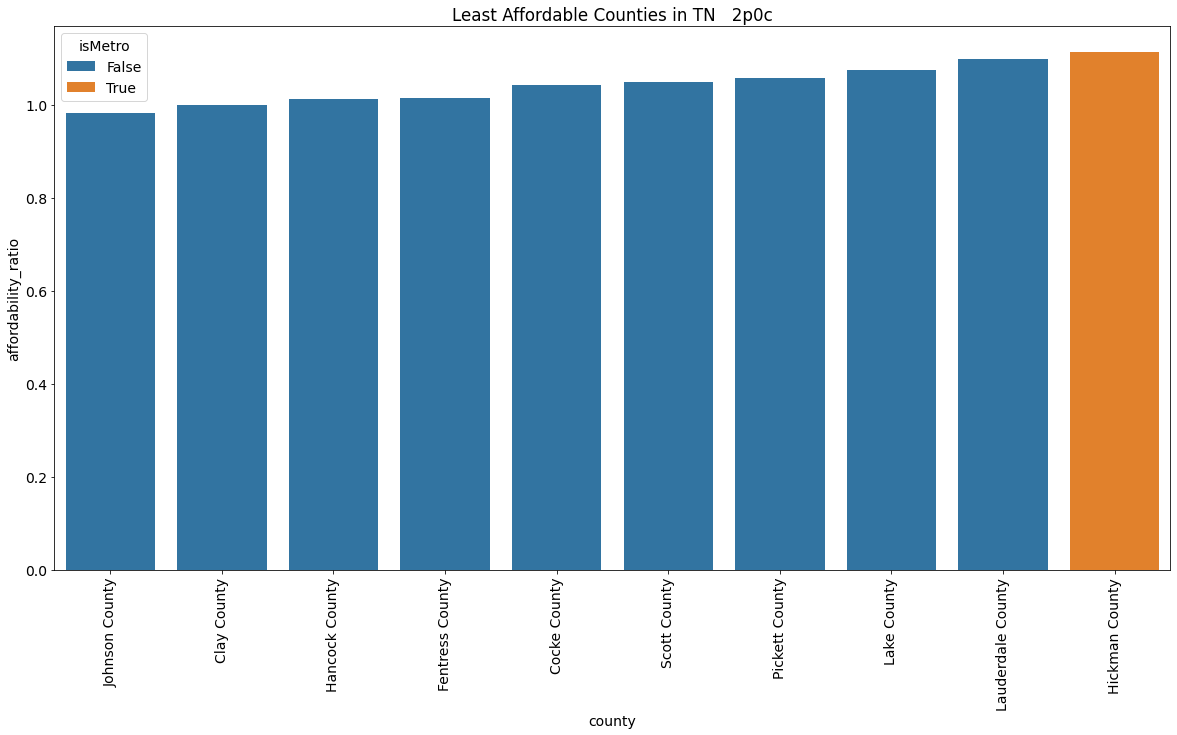

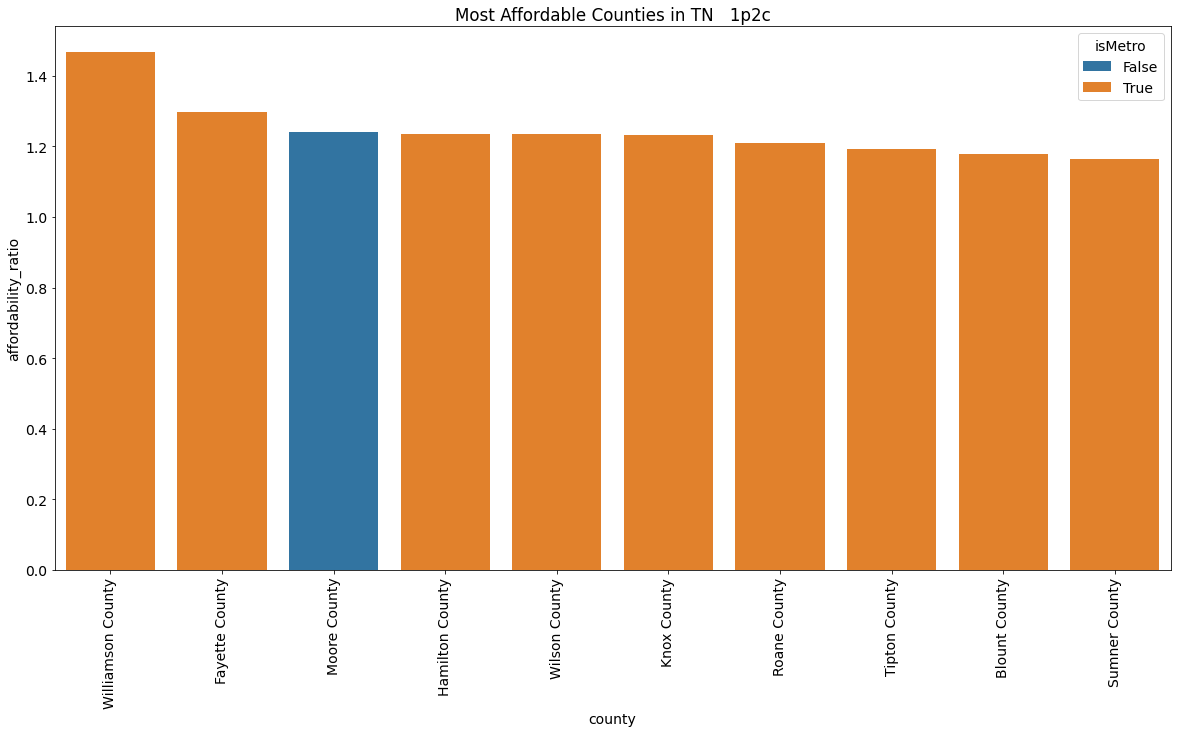

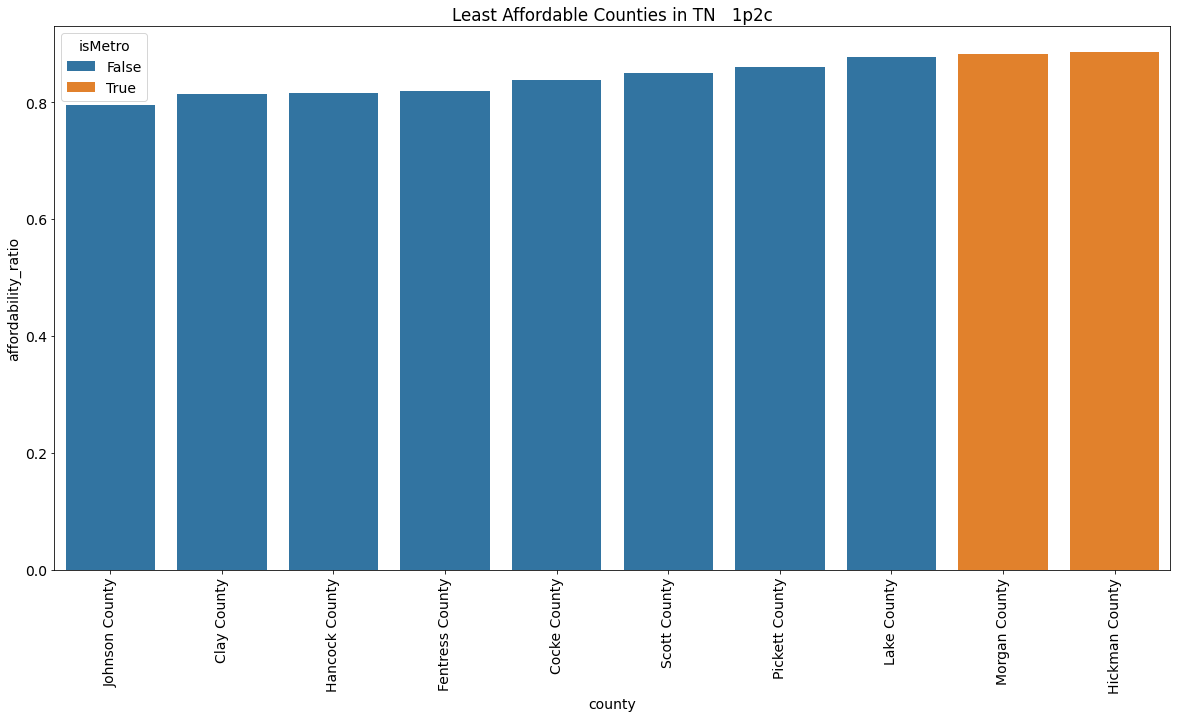

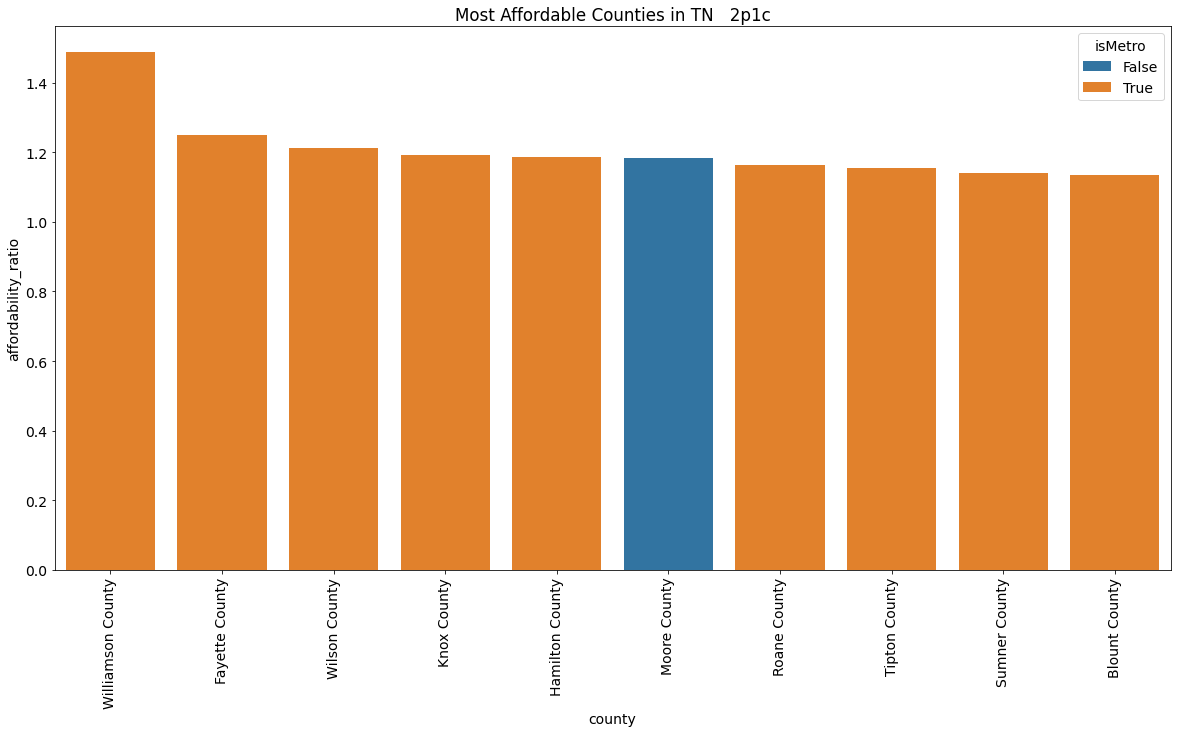

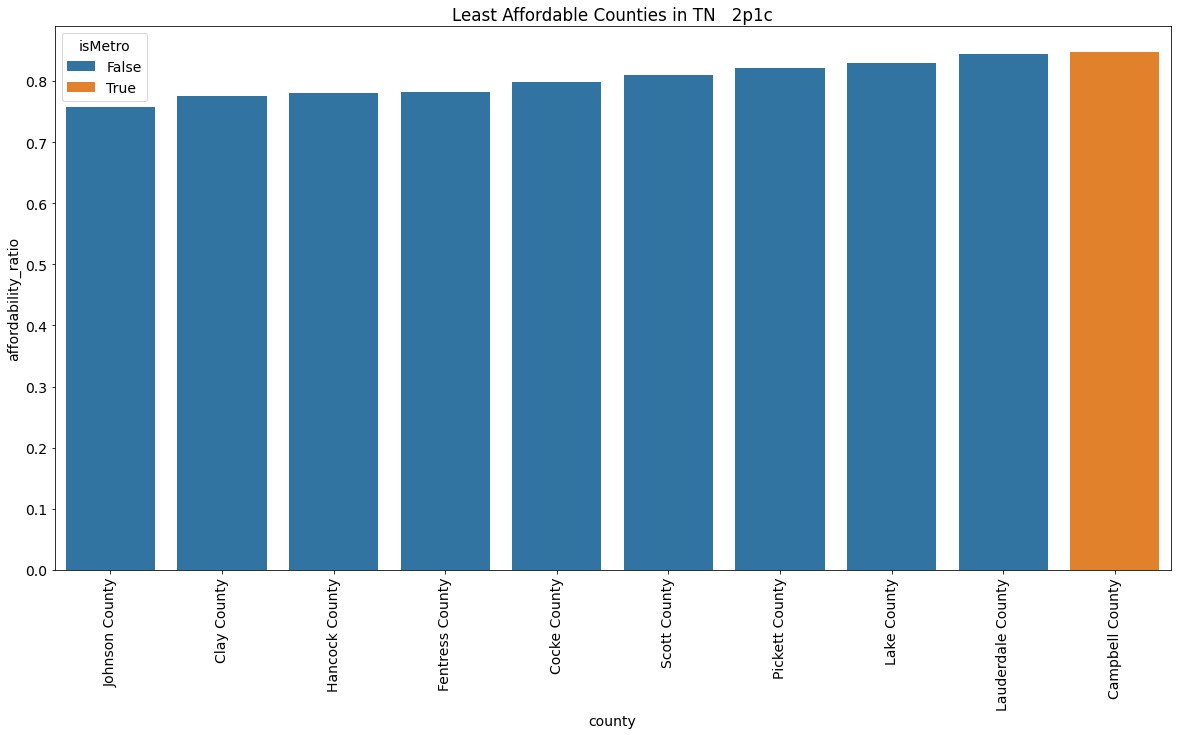

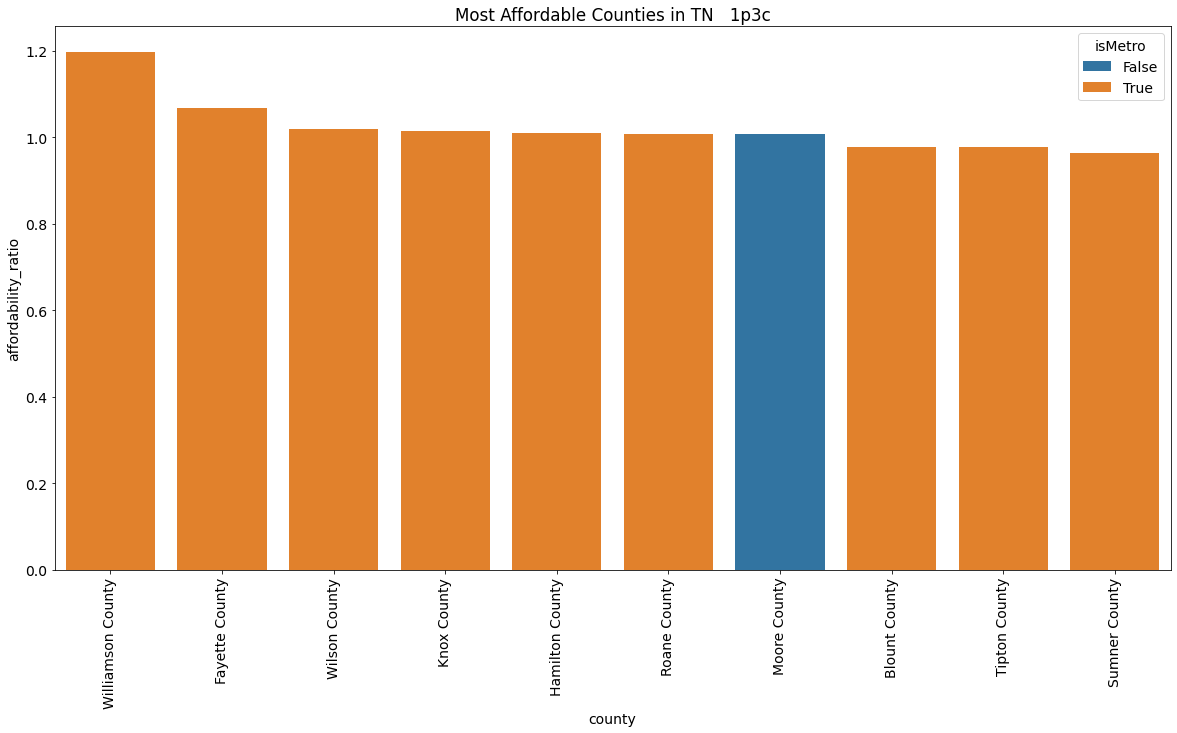

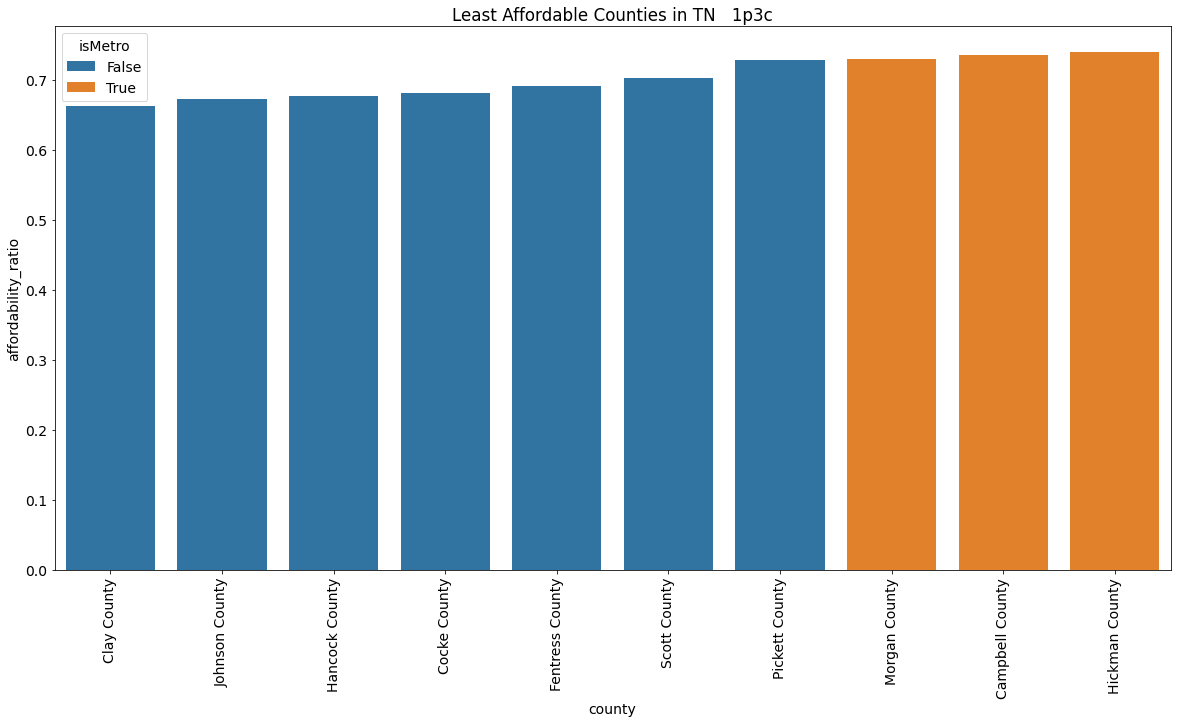

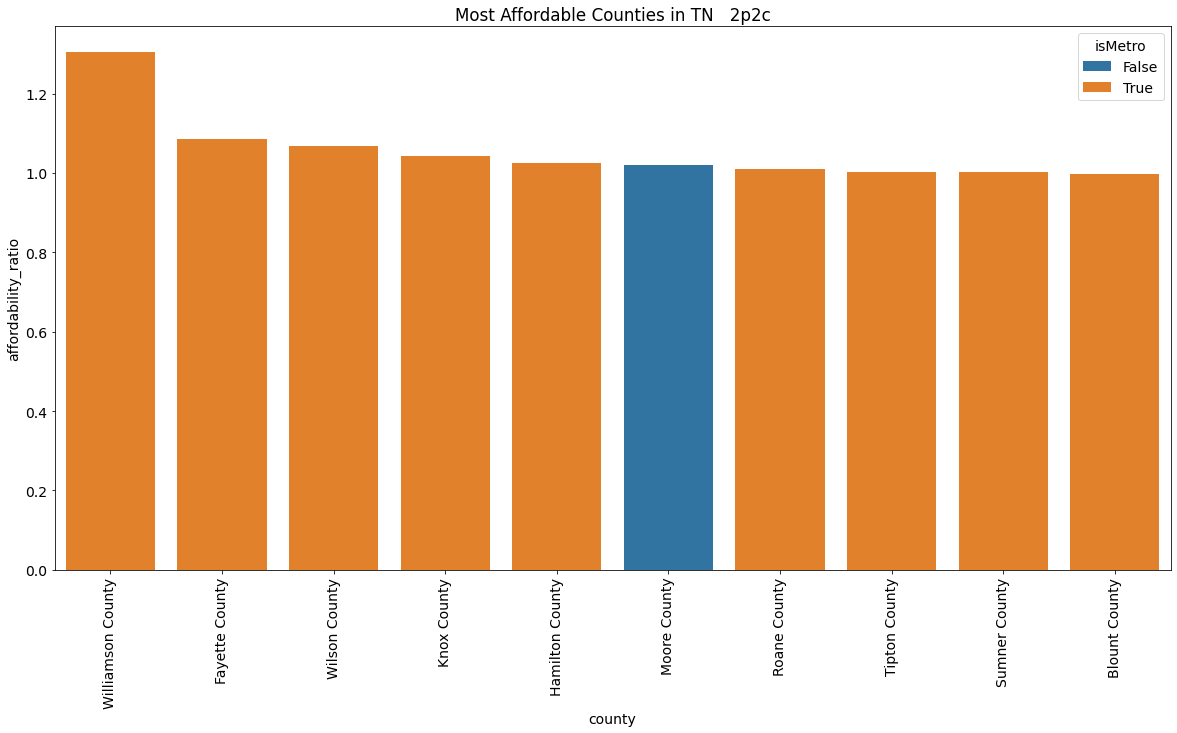

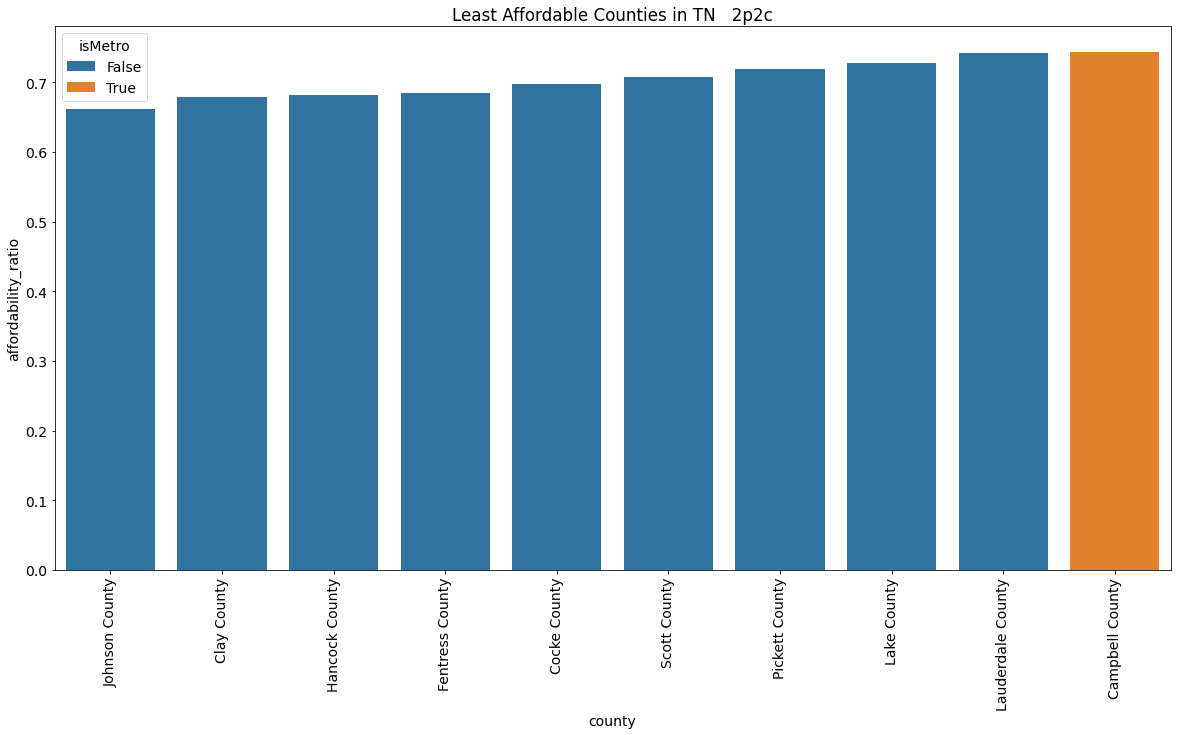

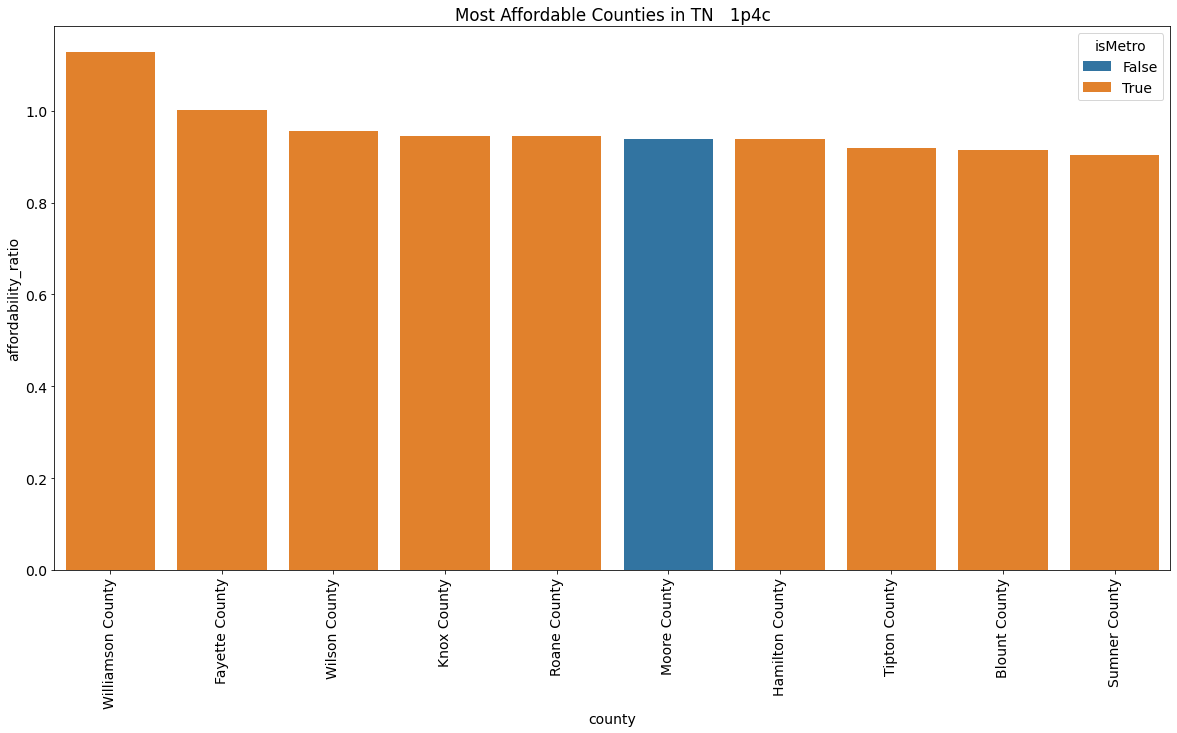

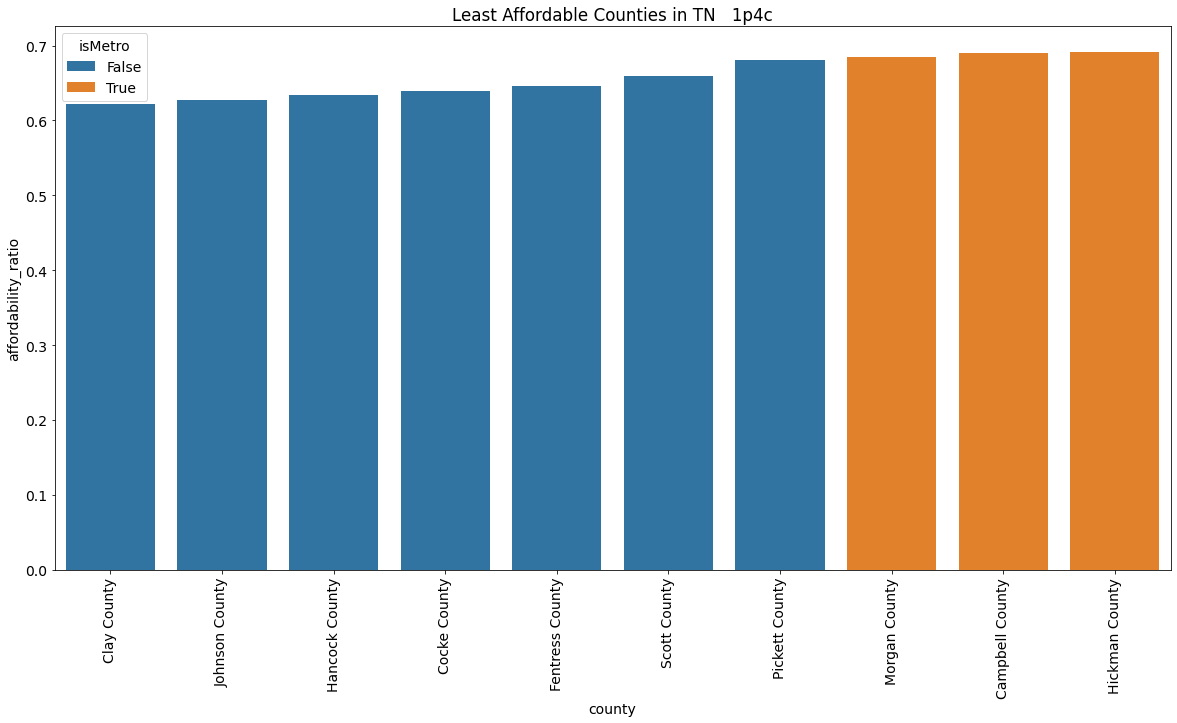

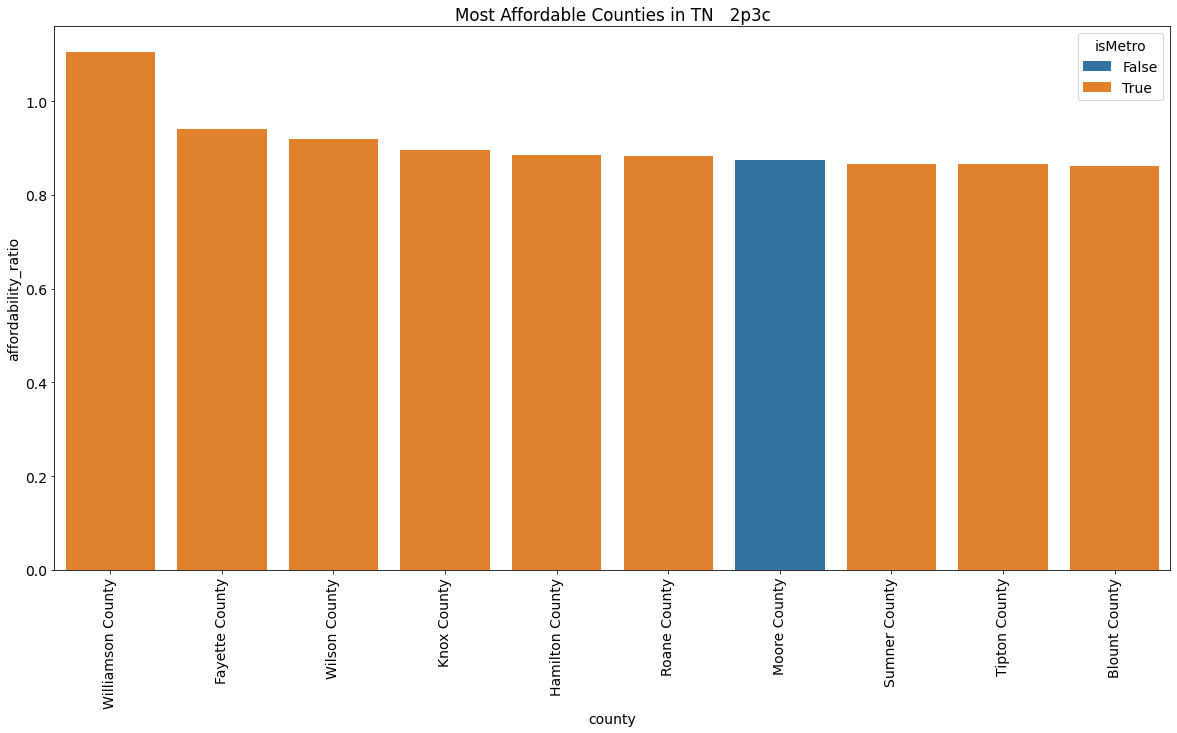

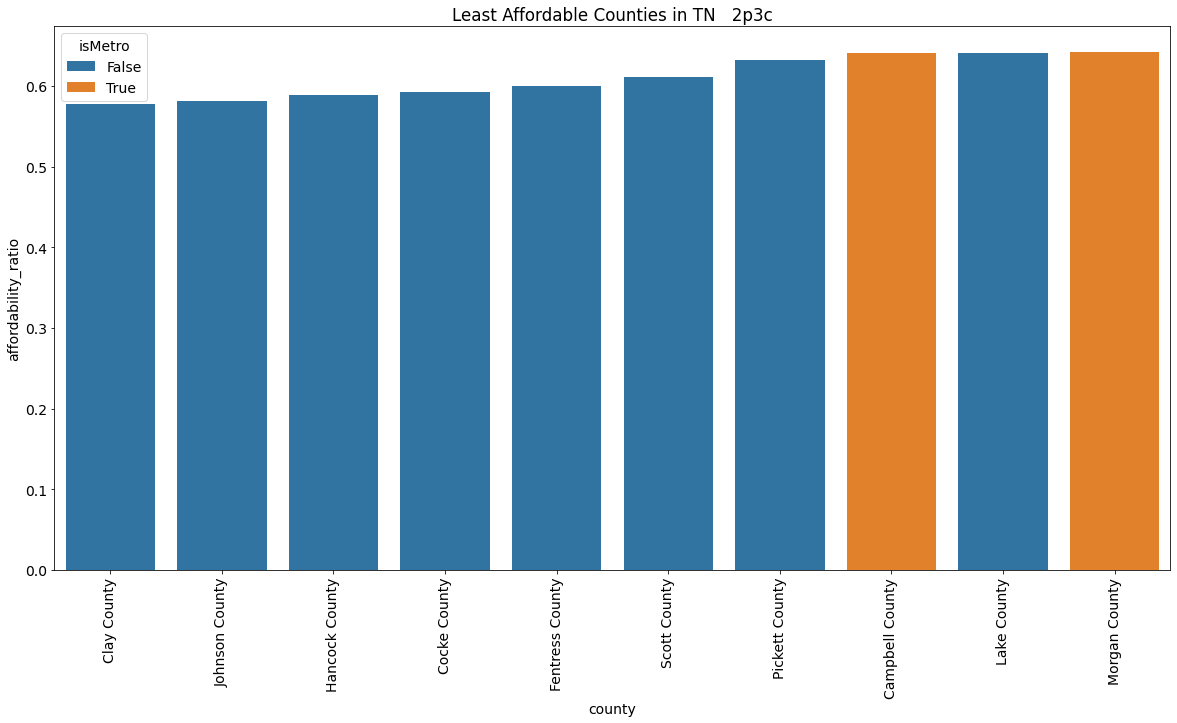

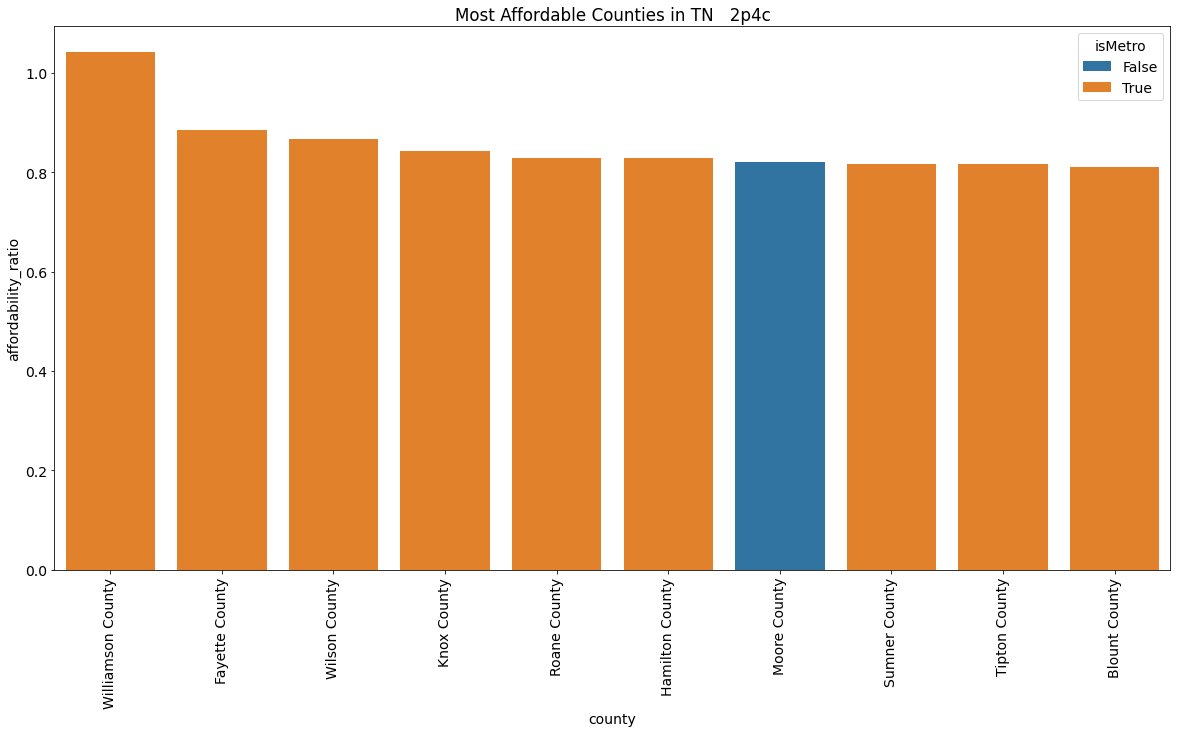

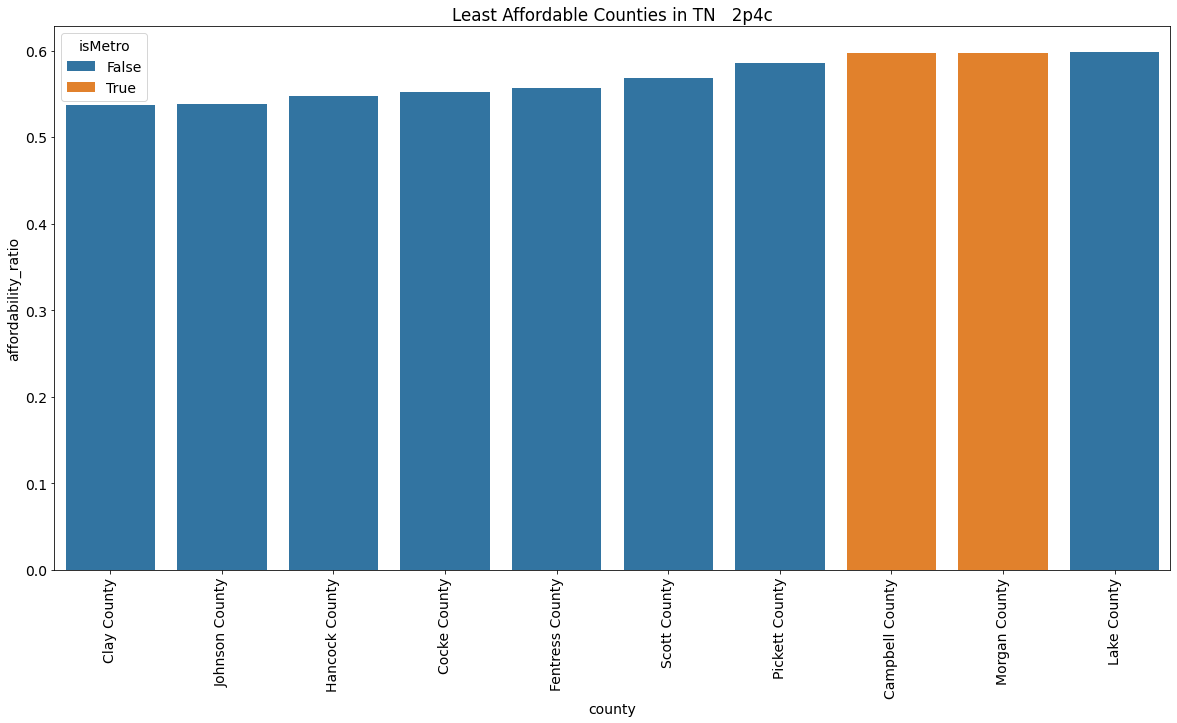

In [29]:
for fs in family_size:
    ds_df = modified_df[(modified_df["family_member_count"] == fs) & (modified_df["state"] == "TN")]
    most_affordable = ds_df.nlargest(10, "affordability_ratio")
    least_affordable = ds_df.nsmallest(10, "affordability_ratio")
    affordability_graphs(most_affordable, "TN", "Most", fs)
    affordability_graphs(least_affordable, "TN", "Least", fs)